# Cancelamento de Clientes - Telco (dataset criado pela IBM para demonstração da ferramenta IBM Cognos Analytics)

### Contém informações sobre uma empresa fictícia de telecomunicações que forneceu serviços de telefonia residencial e internet para 7043 clientes na Califórnia no 3º trimestre.

### Etapa de análise e exploração do dado - Realizado por Sabrina Otoni da Silva - 2024/01

### Objetivo: Classificar os clientes que tem potencial a cancelarem seus contratos com base em características numéricas e categóricas.

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.express as px

# import import_ipynb

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

import sys
import os

automations_dir = os.path.join(os.getcwd(), '../automations')

if automations_dir not in sys.path:
    sys.path.append(automations_dir)

In [2]:
datapath = Path('../data')
xlsx_path = Path(f'{datapath}/d02_intermediate/telco_customer_churn_v2.xlsx')

In [3]:
data = pd.read_excel(f'{xlsx_path}' )
data.head()

City   Latitude   Longitude  Gender Senior Citizen Partner  \
0  Los Angeles  33.964131 -118.272783    Male             No      No   
1  Los Angeles  34.059281 -118.307420  Female             No      No   
2  Los Angeles  34.048013 -118.293953  Female             No      No   
3  Los Angeles  34.062125 -118.315709  Female             No     Yes   
4  Los Angeles  34.039224 -118.266293    Male             No      No   

  Dependents  Tenure Months Phone Service Multiple Lines  ... Tech Support  \
0         No              2           Yes             No  ...           No   
1        Yes              2           Yes             No  ...           No   
2        Yes              8           Yes            Yes  ...           No   
3        Yes             28           Yes            Yes  ...          Yes   
4        Yes             49           Yes            Yes  ...           No   

  Streaming TV Streaming Movies        Contract Paperless Billing  \
0           No               No  Month-to-month               Yes   
1           No               No  Month-to-month               Yes   
2          Yes              Yes  Month-to-month               Yes   
3          Yes              Yes  Month-to-month               Yes   
4          Yes              Yes  Month-to-month               Yes   

              Payment Method Monthly Charges Total Charges Churn Value  \
0               Mailed check           53.85        108.15           1   
1           Electronic check           70.70        151.65           1   
2           Electronic check           99.65        820.50           1   
3           Electronic check          104.80       3046.05           1   
4  Bank transfer (automatic)          103.70       5036.30           1   

                    Churn Reason  
0   Competitor made better offer  
1                          Moved  
2                          Moved  
3                          Moved  
4  Competitor had better devices  

[5 rows x 24 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Latitude           7043 non-null   float64
 2   Longitude          7043 non-null   float64
 3   Gender             7043 non-null   object 
 4   Senior Citizen     7043 non-null   object 
 5   Partner            7043 non-null   object 
 6   Dependents         7043 non-null   object 
 7   Tenure Months      7043 non-null   int64  
 8   Phone Service      7043 non-null   object 
 9   Multiple Lines     7043 non-null   object 
 10  Internet Service   7043 non-null   object 
 11  Online Security    7043 non-null   object 
 12  Online Backup      7043 non-null   object 
 13  Device Protection  7043 non-null   object 
 14  Tech Support       7043 non-null   object 
 15  Streaming TV       7043 non-null   object 
 16  Streaming Movies   7043 

In [5]:
data['City'].value_counts()

Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: City, Length: 1129, dtype: int64

In [6]:
data['Churn Reason'].value_counts()

Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn Reason, 

In [7]:
data.describe().T

count         mean          std         min         25%  \
Latitude         7043.0    36.282441     2.455723   32.555828   34.030915   
Longitude        7043.0  -119.798880     2.157889 -124.301372 -121.815412   
Tenure Months    7043.0    32.371149    24.559481    0.000000    9.000000   
Monthly Charges  7043.0    64.761692    30.090047   18.250000   35.500000   
Total Charges    7043.0  2279.798992  2266.730170   18.800000  398.550000   
Churn Value      7043.0     0.265370     0.441561    0.000000    0.000000   

                         50%          75%          max  
Latitude           36.391777    38.224869    41.962127  
Longitude        -119.730885  -118.043237  -114.192901  
Tenure Months      29.000000    55.000000    72.000000  
Monthly Charges    70.350000    89.850000   118.750000  
Total Charges    1394.550000  3786.600000  8684.800000  
Churn Value         0.000000     1.000000     1.000000

Existem várias colunas que não são numéricas (mas sim categóricas).

In [8]:
le = LabelEncoder()
df = data.copy()

text_data_features = [col for col in df.columns if df[col].dtype == 'object' and col not in ['City', 'Churn Reason']]

for col in text_data_features:
    df[col] = le.fit_transform(df[col].astype(str))
    print(col, ' : ', df[col].unique(), ' = ', le.inverse_transform(df[col].unique()))

Gender  :  [1 0]  =  ['Male' 'Female']
Senior Citizen  :  [0 1]  =  ['No' 'Yes']
Partner  :  [0 1]  =  ['No' 'Yes']
Dependents  :  [0 1]  =  ['No' 'Yes']
Phone Service  :  [1 0]  =  ['Yes' 'No']
Multiple Lines  :  [0 2 1]  =  ['No' 'Yes' 'No phone service']
Internet Service  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
Online Security  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
Online Backup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
Device Protection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Tech Support  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Streaming TV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Streaming Movies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 2 1]  =  ['Month-to-month' 'Two year' 'One year']
Paperless Billing  :  [1 0]  =  ['Yes' 'No']
Payment Method  :  [3 2 0 1]  =  ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [9]:
df.describe()

Latitude    Longitude       Gender  Senior Citizen      Partner  \
count  7043.000000  7043.000000  7043.000000     7043.000000  7043.000000   
mean     36.282441  -119.798880     0.504756        0.162147     0.483033   
std       2.455723     2.157889     0.500013        0.368612     0.499748   
min      32.555828  -124.301372     0.000000        0.000000     0.000000   
25%      34.030915  -121.815412     0.000000        0.000000     0.000000   
50%      36.391777  -119.730885     1.000000        0.000000     0.000000   
75%      38.224869  -118.043237     1.000000        0.000000     1.000000   
max      41.962127  -114.192901     1.000000        1.000000     1.000000   

        Dependents  Tenure Months  Phone Service  Multiple Lines  \
count  7043.000000    7043.000000    7043.000000     7043.000000   
mean      0.231010      32.371149       0.903166        0.940508   
std       0.421508      24.559481       0.295752        0.948554   
min       0.000000       0.000000       0.000000        0.000000   
25%       0.000000       9.000000       1.000000        0.000000   
50%       0.000000      29.000000       1.000000        1.000000   
75%       0.000000      55.000000       1.000000        2.000000   
max       1.000000      72.000000       1.000000        2.000000   

       Internet Service  ...  Device Protection  Tech Support  Streaming TV  \
count       7043.000000  ...        7043.000000   7043.000000   7043.000000   
mean           0.872923  ...           0.904444      0.797104      0.985376   
std            0.737796  ...           0.879949      0.861551      0.885002   
min            0.000000  ...           0.000000      0.000000      0.000000   
25%            0.000000  ...           0.000000      0.000000      0.000000   
50%            1.000000  ...           1.000000      1.000000      1.000000   
75%            1.000000  ...           2.000000      2.000000      2.000000   
max            2.000000  ...           2.000000      2.000000      2.000000   

       Streaming Movies     Contract  Paperless Billing  Payment Method  \
count       7043.000000  7043.000000        7043.000000     7043.000000   
mean           0.992475     0.690473           0.592219        1.574329   
std            0.885091     0.833755           0.491457        1.068104   
min            0.000000     0.000000           0.000000        0.000000   
25%            0.000000     0.000000           0.000000        1.000000   
50%            1.000000     0.000000           1.000000        2.000000   
75%            2.000000     1.000000           1.000000        2.000000   
max            2.000000     2.000000           1.000000        3.000000   

       Monthly Charges  Total Charges  Churn Value  
count      7043.000000    7043.000000  7043.000000  
mean         64.761692    2279.798992     0.265370  
std          30.090047    2266.730170     0.441561  
min          18.250000      18.800000     0.000000  
25%          35.500000     398.550000     0.000000  
50%          70.350000    1394.550000     0.000000  
75%          89.850000    3786.600000     1.000000  
max         118.750000    8684.800000     1.000000  

[8 rows x 22 columns]

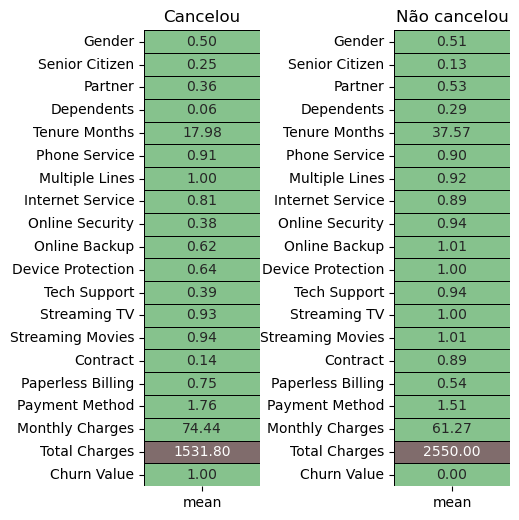

In [10]:
colors = ['#86c28d','#806c6c']

churn = df[df['Churn Value'] == 1].describe().T.drop(['Latitude', 'Longitude'])
not_churn = df[df['Churn Value'] == 0].describe().T.drop(['Latitude', 'Longitude'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']], annot = True, cmap = colors, linewidths = 0.4, linecolor = 'black', cbar = False, fmt = '.2f')
plt.title('Cancelou');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Não cancelou');

fig.tight_layout(pad = 0)

- Os valores de clientes que tem parceiro(a) é maior para os que não cancelaram do que os que cancelaram. O mesmo acontece para clientes que tem dependentes.
- Clientes que cancelaram tinham um período médio de permanência baixo, de 17.98 meses, em comparação com aqueles que continuaram, que apresentaram um período médio de permanência de 37.57 meses. (Tenure Months)
- Os valores médios de Online Security, Online Backup, Device Protection e Tech Support são maiores para os clientes que não cancelaram do que os que cancelaram.
- O valor de contratos de clientes que cancelaram é bem menor do que daqueles que não cancelaram. (Contract)
- Monthly Charges dos que cancelaram é na média de 74.44, maior do que os que não cancelaram, de 61.27.
- Clientes que não cancelaram em Total Charges (2550.00) é maior do que os que cancelaram (1531.80).

Agora vou separar os dados categóricos dos dados numéricos.

In [11]:
categorical_features = []
numerical_features = []

for i in list(df.columns):
    if (i == 'Senior Citizen'):
        categorical_features.append(i)
    elif (data[i].dtype != np.float64) & (data[i].dtype != np.int64()):
        categorical_features.append(i)
    else:
        numerical_features.append(i)

print('Dados Categóricos:',*categorical_features)
print('Dados Numéricos:',*numerical_features)

Dados Categóricos: City Gender Senior Citizen Partner Dependents Phone Service Multiple Lines Internet Service Online Security Online Backup Device Protection Tech Support Streaming TV Streaming Movies Contract Paperless Billing Payment Method Churn Reason
Dados Numéricos: Latitude Longitude Tenure Months Monthly Charges Total Charges Churn Value


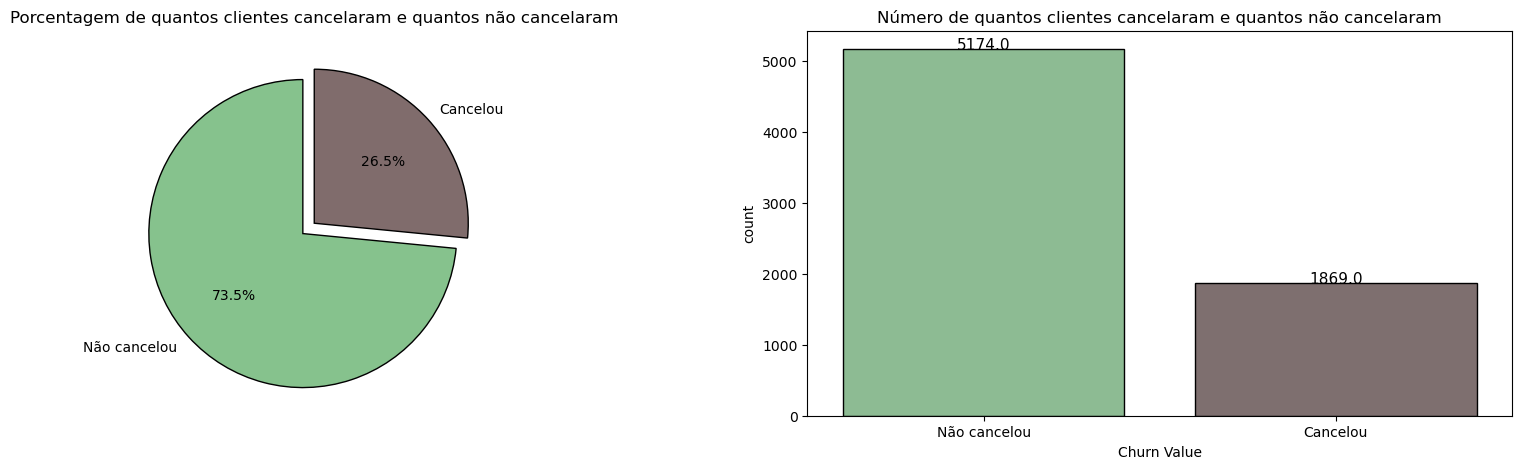

In [12]:
l = list(df['Churn Value'].value_counts())

circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100] # Não cancelou / Cancelou

fig = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
plt.subplot(1,2,1)
plt.pie(circle, labels = ['Não cancelou', 'Cancelou'], autopct='%1.1f%%', startangle=90, explode=(0.1,0), colors=colors,
       wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Porcentagem de quantos clientes cancelaram e quantos não cancelaram');

plt.subplot(1,2,2)
ax = sns.countplot(x='Churn Value', data=data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['Não cancelou', 'Cancelou'])
    
plt.title('Número de quantos clientes cancelaram e quantos não cancelaram');
plt.show()

Temos um desbalanceamento muito grande nos dados fornecidos. As visualizações e as predições vão estar enviesadas para os clientes que não cancelaram.

Irei focar nos dados de clientes que cancelaram posteriormente, para conseguir entender afundo o comportamento dos dados.

Agora vou separar os dados categóricos para uma melhor organização e poder prosseguir com as visualizações.

In [13]:
categorical_features

['City',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Reason']

In [14]:
c1 = ['Gender', 'Senior Citizen', 'Partner', 'Dependents'] # Informações do cliente

c2 = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 
      'Tech Support', 'Streaming TV', 'Streaming Movies'] # Informações dos serviços

c3 = ['Contract', 'Paperless Billing', 'Payment Method'] # Informações de pagamento

Propositalmente estarei deixando a coluna City de fora, irei utilizá-la depois para outras plotagens.

# Análise dos dados categóricos.

## Informações do cliente.

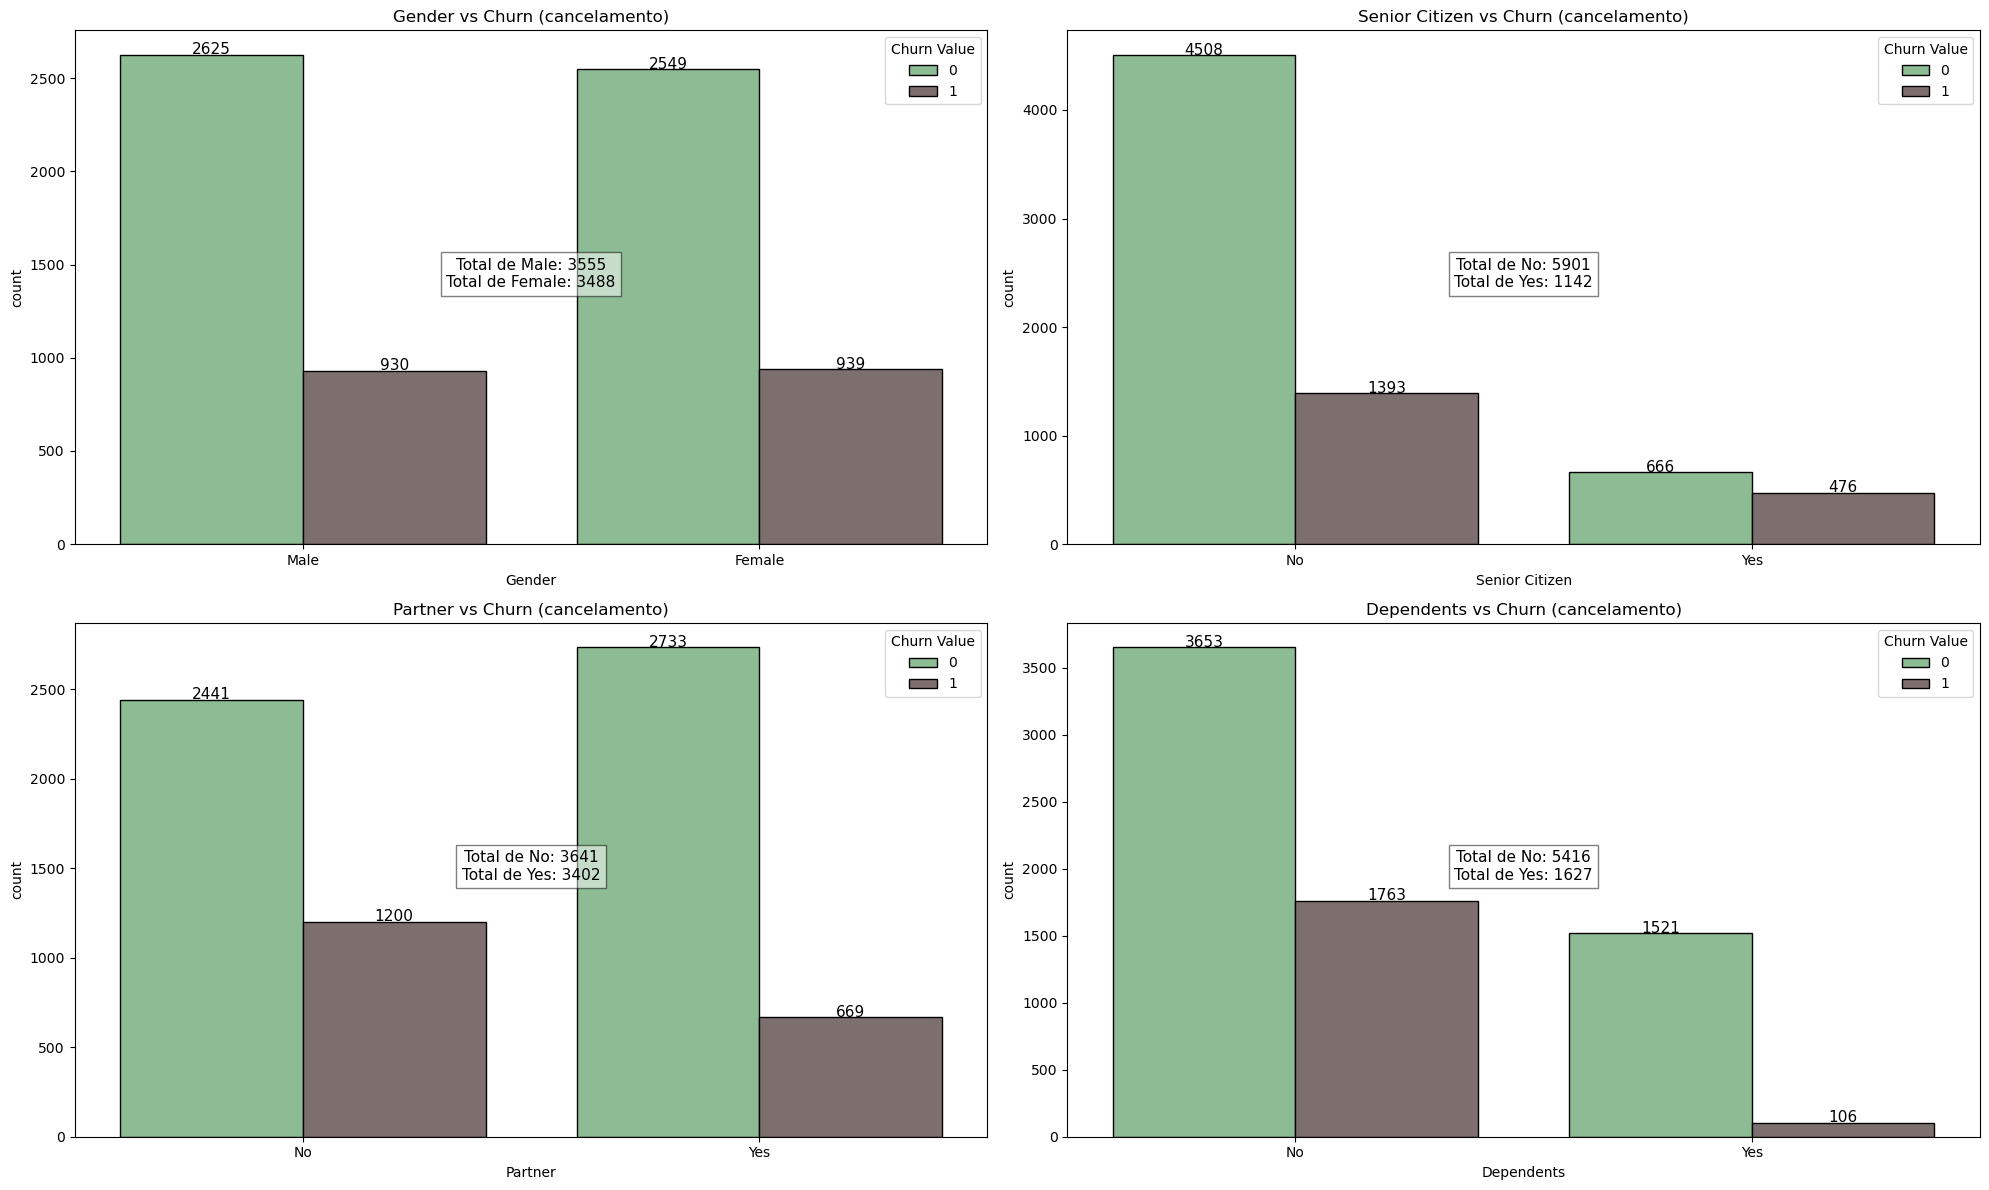

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))

for i, col in enumerate(c1):
    ax = sns.countplot(x=col, data=data, hue='Churn Value', palette=colors, edgecolor='black', ax=axes[i//2, i%2])
    
    ax.text(0.5, 0.5, '\n'.join([f'Total de {category}: {count}' for category, count in data[col].value_counts().items()]), 
            transform=ax.transAxes, ha='center', fontsize=11, bbox=dict(facecolor='white', alpha=0.5))

    for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 2, int(height), ha='center', fontsize=11)
    ax.set_title(f'{col} vs Churn (cancelamento)')

plt.tight_layout()
plt.show()

- Há um número muito maior de clientes que tem abaixo de 65 anos. Mesmo assim, o comportamento para pessoas +65 que cancelaram ou não é bem equiparado. Já pessoas que tem abaixo de 65, tem um comportamento de tender a não cancelar, se analisado de forma individual.
- Clientes que tem algum(a) parceiro(a) tendem a cancelar menos comparado aos que não tem.
- O mesmo comportamento se repete para os que tem dependentes, mesmo que a amostra de clientes com dependentes seja bastante diferente dos clientes que não tem.

## Informações dos serviços.

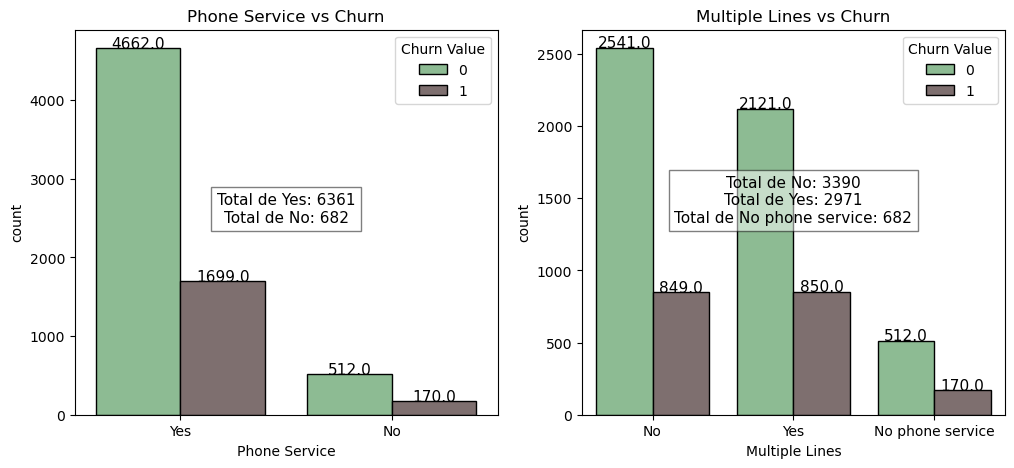

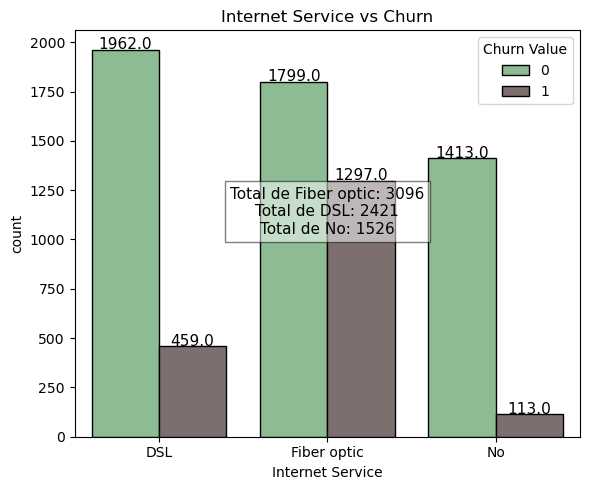

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i in range(2):
    ax = sns.countplot(x=c2[i], data=data, hue="Churn Value", palette=colors, edgecolor='black', ax=axes[i])
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)

    ax.text(0.5, 0.5, '\n'.join([f'Total de {category}: {count}' for category, count in data[c2[i]].value_counts().items()]), 
            transform=ax.transAxes, ha='center', fontsize=11, bbox=dict(facecolor='white', alpha=0.5))

    ax.set_title(c2[i] + ' vs Churn')

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
sns.countplot(x=c2[2], data=data, hue="Churn Value", palette=colors, edgecolor='black', ax=ax)
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)

ax.text(0.5, 0.5, '\n'.join([f'Total de {category}: {count}' for category, count in data[c2[2]].value_counts().items()]), 
        transform=ax.transAxes, ha='center', fontsize=11, bbox=dict(facecolor='white', alpha=0.5))

ax.set_title(c2[2] + ' vs Churn')

plt.tight_layout()
plt.show()

- Há um número muito maior de clientes que tem serviço de telefone residencial do que clientes que não tem.
- Clientes que adotaram a fibra óptica tem uma tendência muito maior em cancelar. Ao contrário dos que adotaram DSL que demonstraram mais satisfação com o serviço de internet, e tem um número muito menor de cancelamentos. Para os clientes que não tem serviço de internet, tem menos possibilidade de cancelar, do que os que adotaram algum serviço.

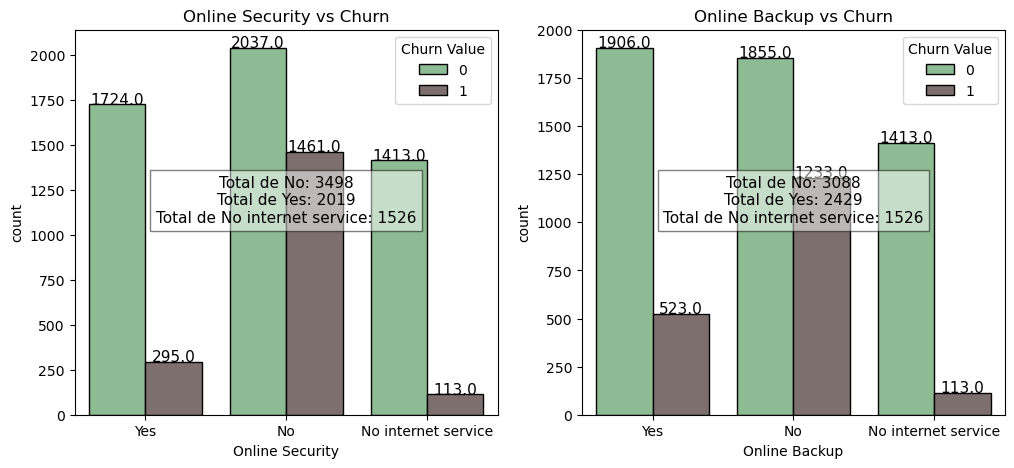

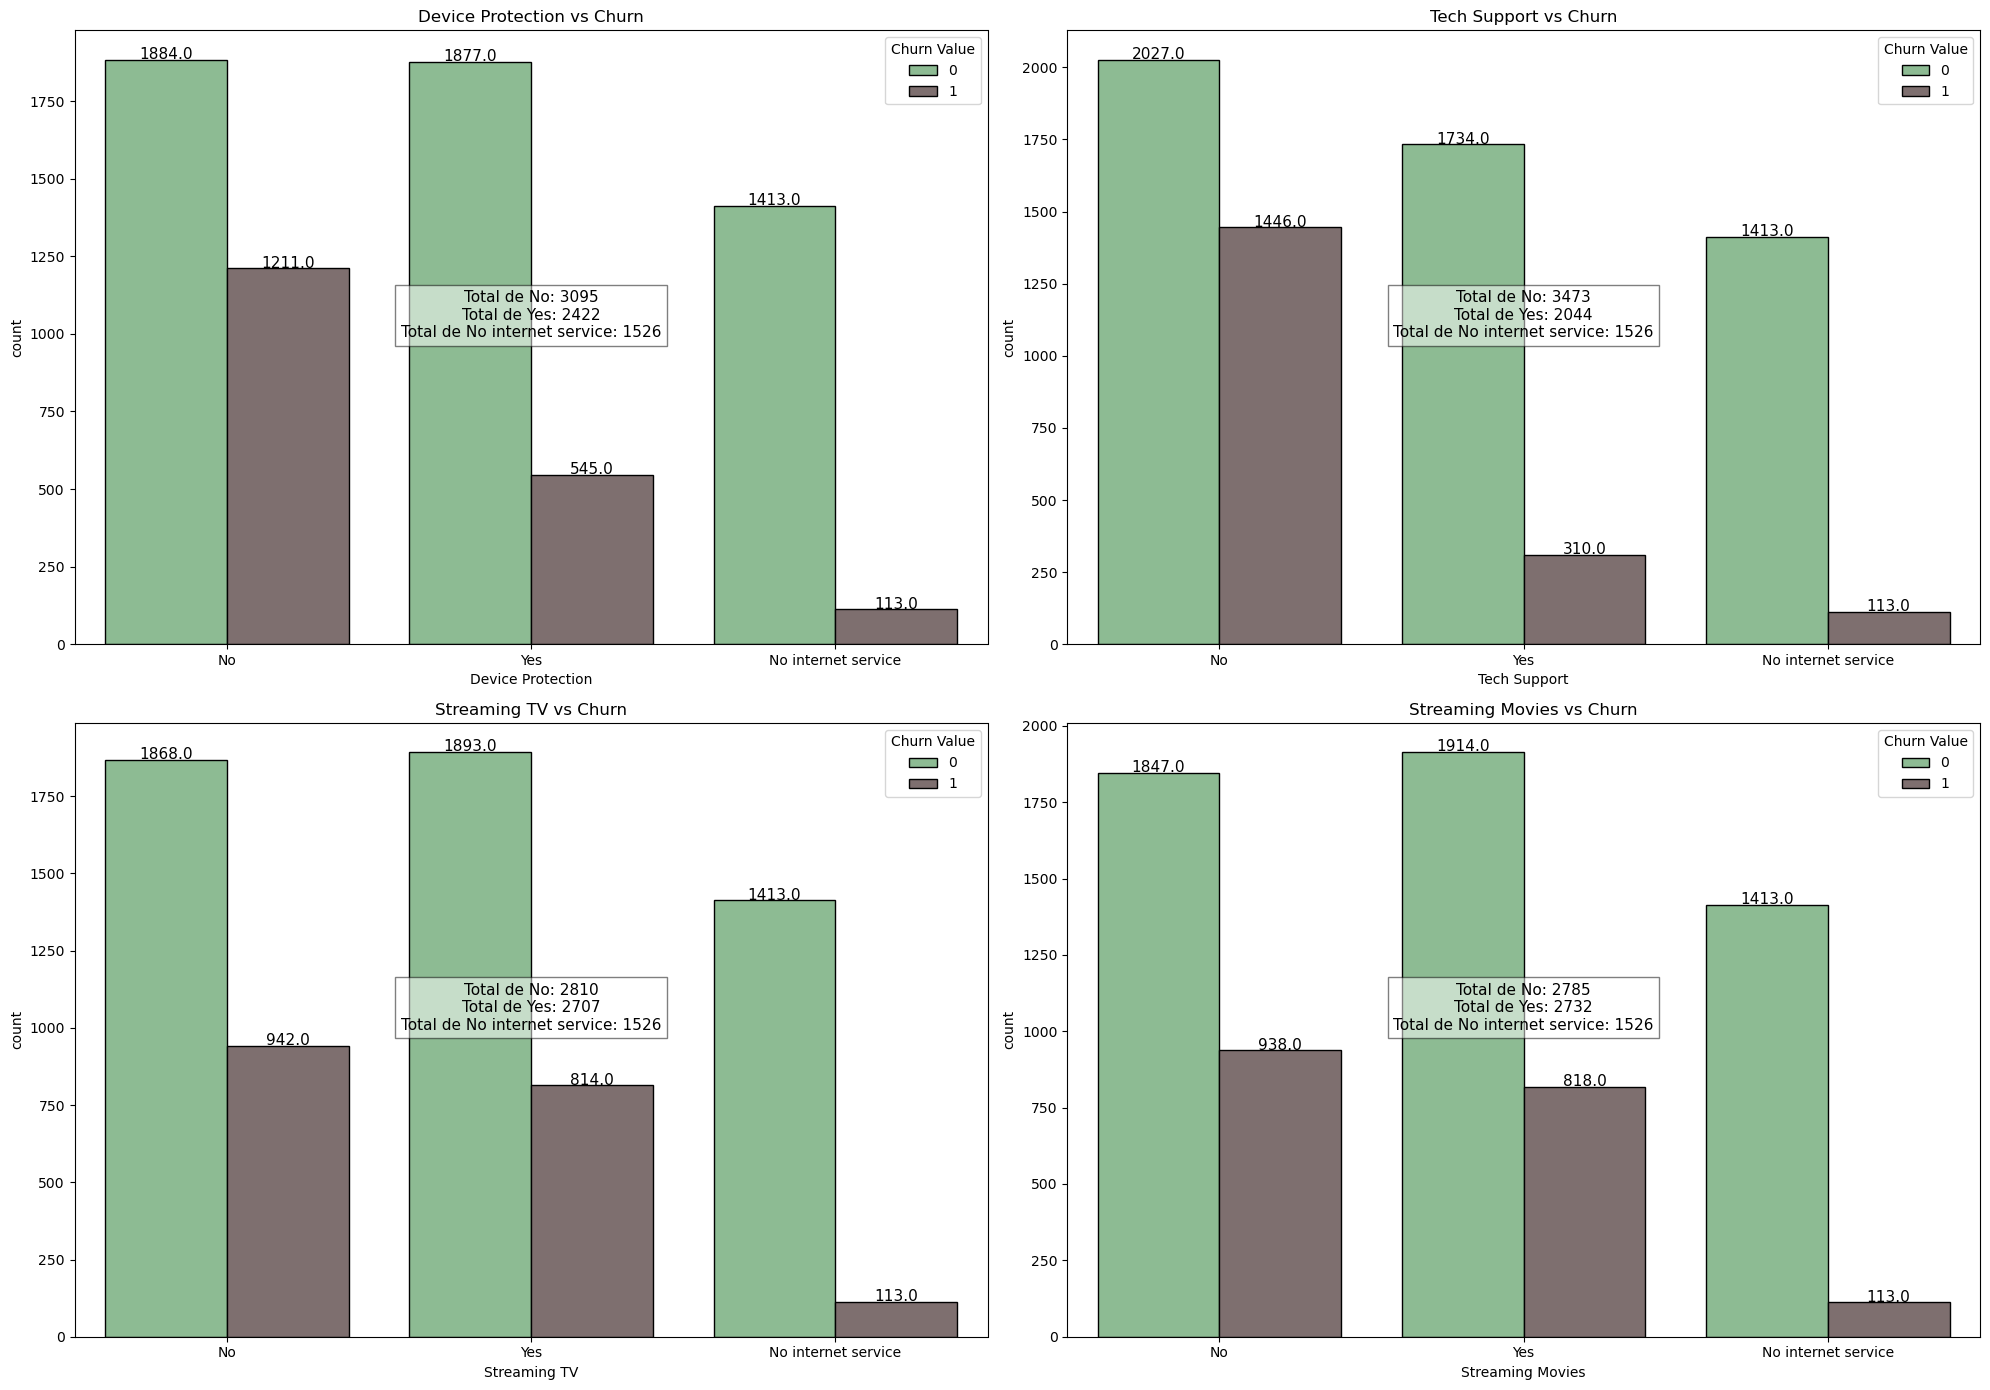

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
for i in range(2):
    ax = sns.countplot(x=c2[i + 3], data=data, hue="Churn Value", palette=colors, edgecolor='black', ax=axes[i])
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)

    ax.text(0.5, 0.5, '\n'.join([f'Total de {category}: {count}' for category, count in data[c2[i + 3]].value_counts().items()]), 
            transform=ax.transAxes, ha='center', fontsize=11, bbox=dict(facecolor='white', alpha=0.5))

    ax.set_title(c2[i + 3] + ' vs Churn')

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))
for i in range(4):
    ax = sns.countplot(x=c2[i + 5], data=data, hue="Churn Value", palette=colors, edgecolor='black', ax=axes[i//2, i%2])
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)

    ax.text(0.5, 0.5, '\n'.join([f'Total de {category}: {count}' for category, count in data[c2[i + 5]].value_counts().items()]), 
            transform=ax.transAxes, ha='center', fontsize=11, bbox=dict(facecolor='white', alpha=0.5))

    ax.set_title(c2[i + 5] + ' vs Churn')

plt.tight_layout()
plt.show()

- Online Security, Online Backup, Device Protection e Tech Support se mostraram ser serviços cruciais para os clientes não cancelarem. Clientes que não obtem esses serviços demonstraram uma maior chance de cancelamento.
- Streaming TV e Streaming Movies demonstram gráficos bem parecidos, e a taxa de cancelamento é bem próxima independentemente de ser assinante ou não desses serviços.


## Informações de pagamento.

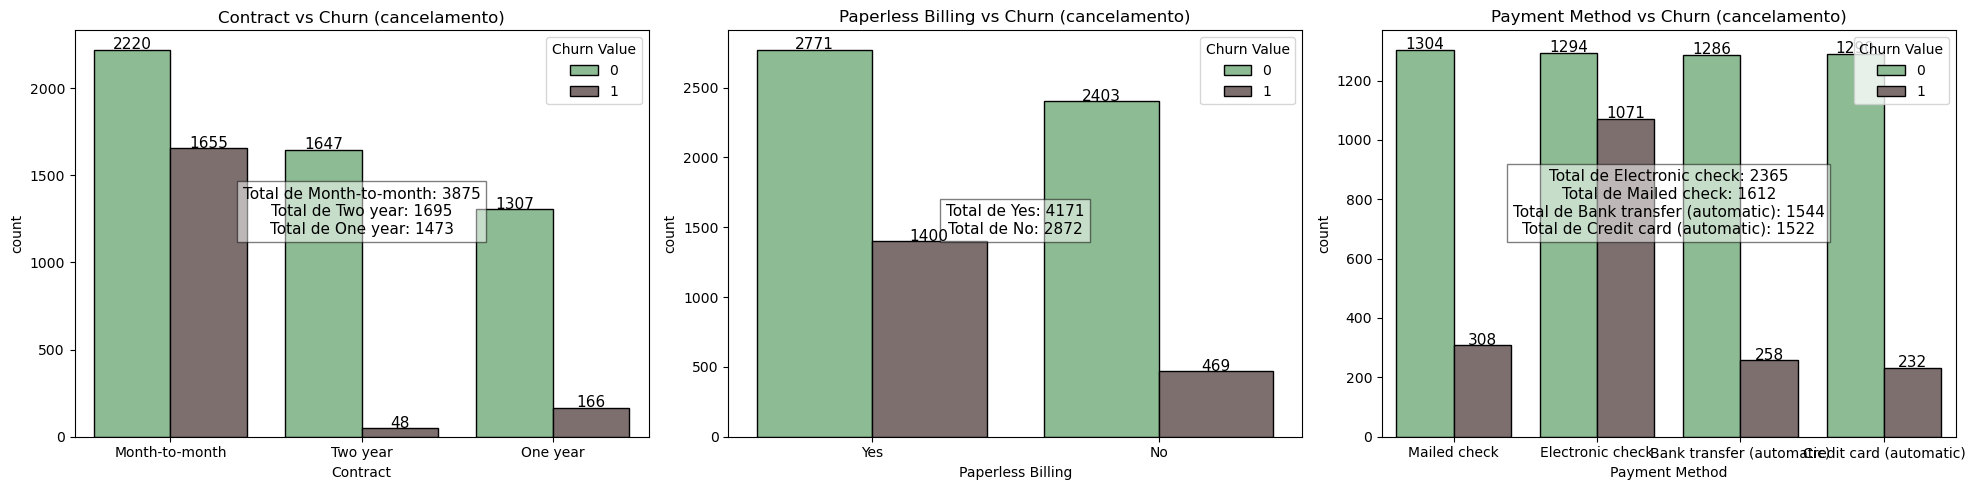

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, col in enumerate(c3):
    ax = sns.countplot(x=col, data=data, hue='Churn Value', palette=colors, edgecolor='black', ax=axes[i])
    
    ax.text(0.5, 0.5, '\n'.join([f'Total de {category}: {count}' for category, count in data[col].value_counts().items()]), 
            transform=ax.transAxes, ha='center', fontsize=11, bbox=dict(facecolor='white', alpha=0.5))

    for rect in ax.patches:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 2, int(height), ha='center', fontsize=11)
    
    ax.set_title(f'{col} vs Churn (cancelamento)')

plt.tight_layout()
plt.show()

- Possívelmente, contratos mensais tenham uma taxa de cancelamento muito maior por serviços como "x meses grátis". Ou seja, são clientes que estão apenas testando os serviços oferecidos. Outra razão é pelos serviços de streaming, internet e telefone, caso o cliente não fique satisfeito, ele pode querer cancelar o contrato mais facilmente por se tratar de um contrato mensal. Contratos de 1/2 anos tem uma estabilidade maior, e geralmente são clientes que fazem a longo prazo por gostarem mais do serviço de sua prioridade, e podem pagar mais barato por conta disso. 
- Cobranças eletrônicas tendem a ter muito mais cancelamentos. Há algumas hipóteses: pode ser por conta de problemas na hora de pagar ou pela razão de mais que a metade dos clientes optaram por cobranças eletrônicas, então isso tende a ser um falso alarme de essa ser uma das razões de cancelamentos de clientes. Isso nos leva a observar mais o último ponto:
- Cheques eletrônicos foram o maior alvo de cancelamentos. De 2365 clientes que optaram pelo método de pagamento "Electronic check", 1071 cancelaram. A empresa certamente precisa dar uma atenção nesse caso, mudando a estratégia ou apenas retirando essa opção de pagamento.

Agora irei focar 100% nos clientes que cancelaram.

## Informações dos clientes que cancelaram.

In [19]:
gender = data[data['Churn Value'] == 1]['Gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = data[data['Churn Value'] == 1]['Senior Citizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No / Yes

partner = data[data['Churn Value'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No / Yes

dependents = data[data['Churn Value'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No / Yes

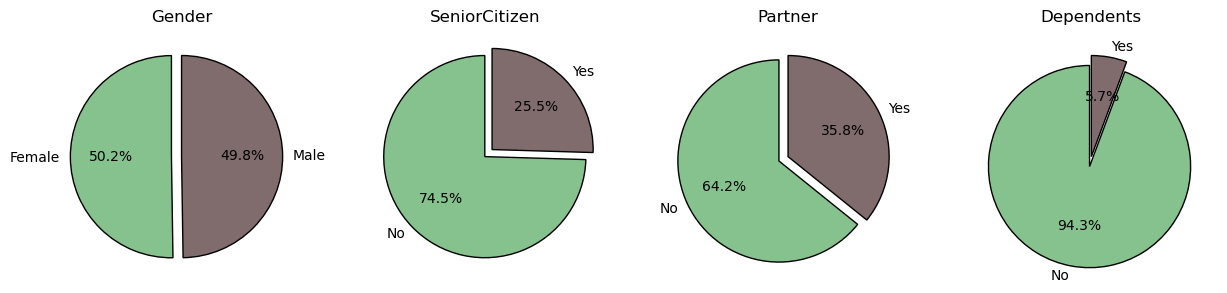

In [20]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

- 74.5% dos clientes que cancelaram, não são +65 anos.
- 64.2% não tem parceiro(a).
- 94.3% não tem dependentes.
- Ou seja, uma média de 79.25% são clientes que possívelmente moram sozinhos.

## Informações dos serviços (clientes que cancelaram).

In [21]:
phoneservice = data[data['Churn Value'] == 1]['Phone Service'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # Yes / No

multiplelines = data[data['Churn Value'] == 1]['Multiple Lines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # Yes / No / No Phone Service 

internetservice = data[data['Churn Value'] == 1]['Internet Service'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # Fiber Optic/ DSL / No 

streamingtv = data[data['Churn Value'] == 1]['Streaming TV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No / Yes / No internet service 

streamingmovies = data[data['Churn Value'] == 1]['Streaming Movies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No / Yes / No Internet Service

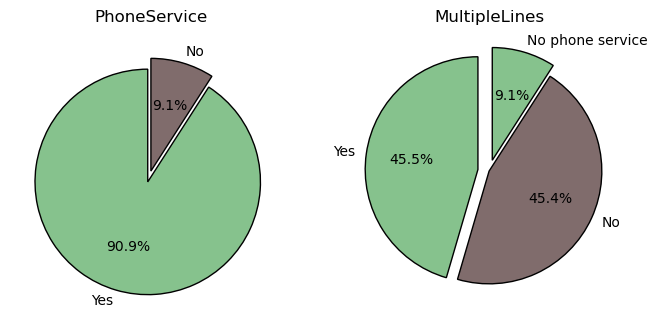

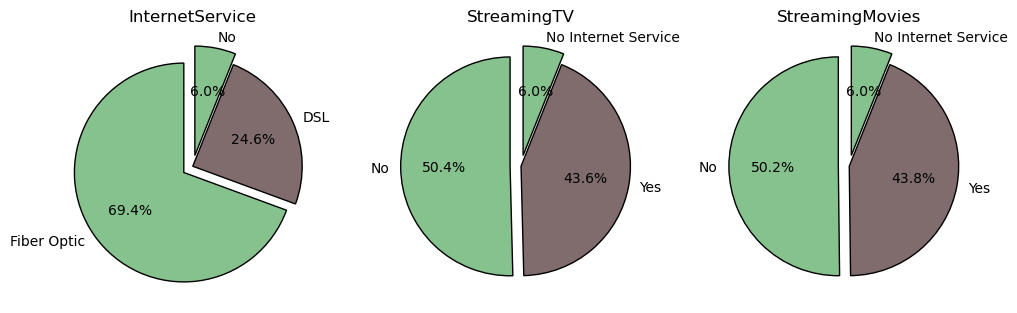

In [22]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['Yes', 'No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['Yes','No','No phone service'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['Fiber Optic', 'DSL','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'Yes','No Internet Service'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'Yes','No Internet Service'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');

- 90.9% dos clientes que cancelaram tinham serviço de telefone, e independentemente da disponibilidade de múltiplas linhas, os clientes cancelaram de qualquer forma.
- Sobre os serviços de internet, os clientes claramente ficaram insatisfeitos com o de fibra óptica (69.4% de cancelamentos).
- Agora para os serviços de streaming, uma média de 43.7% cancelaram consumindo esses serviços. 50% foram que não consumiram e cancelaram.

In [23]:
onlinesecurity = data[data['Churn Value'] == 1]['Online Security'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No / Yes / No Internet Service

onlinebackup = data[data['Churn Value'] == 1]['Online Backup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No / Yes / No Internet Service

deviceprotection = data[data['Churn Value'] == 1]['Device Protection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No / Yes / No Internet Service

techsupport = data[data['Churn Value'] == 1]['Tech Support'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No / Yes / No Internet Service

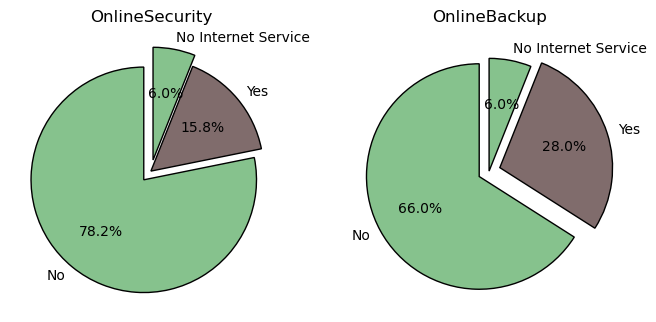

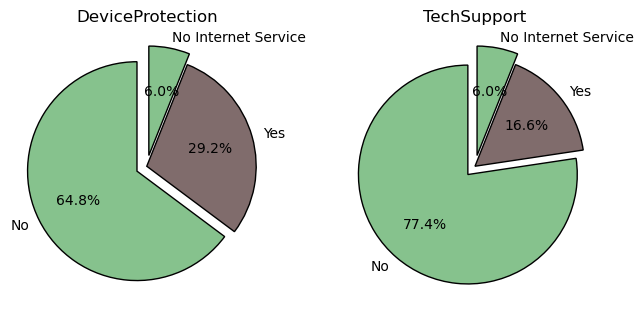

In [24]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(onlinesecurity,labels = ['No', 'Yes','No Internet Service'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,2,2)
plt.pie(onlinebackup,labels = ['No', 'Yes','No Internet Service'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(deviceprotection,labels = ['No', 'Yes','No Internet Service'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,3,2)
plt.pie(techsupport,labels = ['No', 'Yes','No Internet Service'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');


- Novamente, fica nítido que clientes que não obtiveram os serviços de Online Security, Online Backup, Device Protection e Tech Support tendem a cancelar mais, nos dados acima, temos uma média de 71.6% de cancelamentos para esses casos.

## Informações de pagamento (clientes que cancelaram).

In [25]:
contract = data[data['Churn Value'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month / One year / Two year

paperlessbilling = data[data['Churn Value'] == 1]['Paperless Billing'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # Yes / No 

paymentmethod = data[data['Churn Value'] == 1]['Payment Method'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, paymentmethod[2] / sum(paymentmethod) * 100, 
                 paymentmethod[3] / sum(paymentmethod) * 100] # Electronic check / Mailed check / Bank transfer (automatic) / Credit card (automatic)

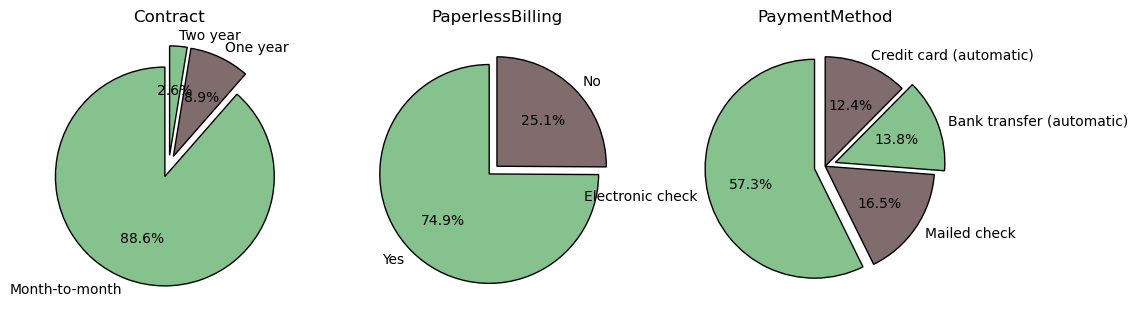

In [26]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['Yes', 'No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');

- A taxa de cancelamento para contratos mensais chega em 88.6%!
- Para cobranças eletrônicas, 74.9%!
- E o método de pagamento que mais tem casos de cancelamento é o cheque eletrônico, com porcentagem de 57.3%.

In [27]:
numerical_features

['Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Churn Value']

Estarei retiranto propositalmente as colunas de Latitude e Longitude, por enquanto, das análises.

In [28]:
numerical_features_temp = numerical_features[2:]

# Análise dos dados numéricos.

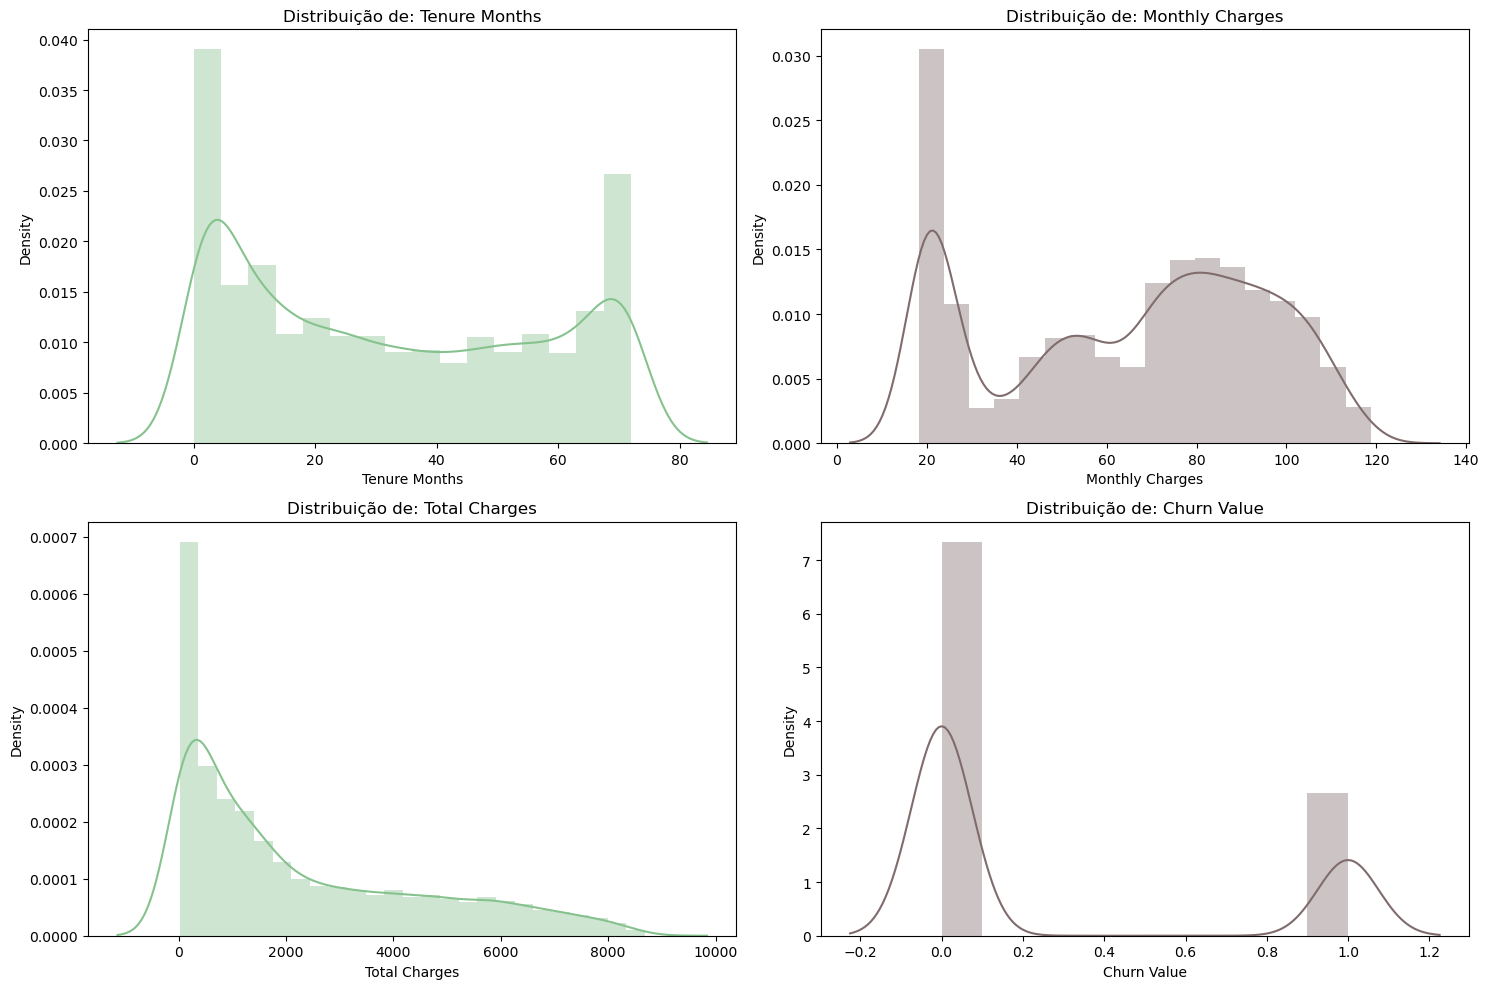

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i in range(4):
    sns.distplot(data[numerical_features_temp[i]], color=colors[i % len(colors)], ax=axs[i//2, i%2])
    axs[i//2, i%2].set_title('Distribuição de: ' + numerical_features_temp[i])

plt.tight_layout()
plt.show()

- Tenure Months, Monthly Charges e CLTV parecem ser uma distribuição bimodal.
- Total Charges é uma distribuição distorcida à direita/distribuição positiva.

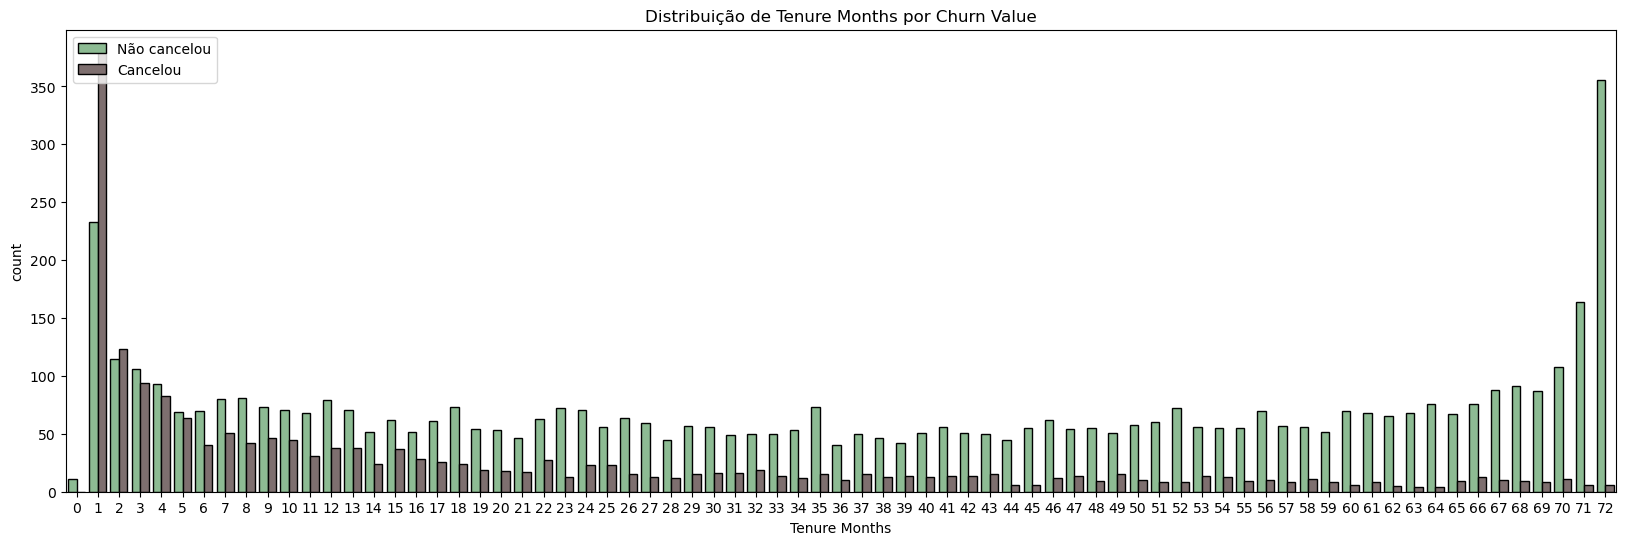

In [30]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Tenure Months', data=data, hue='Churn Value', palette=colors, edgecolor='black')
plt.legend(['Não cancelou', 'Cancelou'], loc='upper left')
plt.title('Distribuição de Tenure Months por Churn Value')
plt.show()

- O comportamento de cancelamentos decai conforme o tempo que o cliente continua com a empresa. Os primeiros meses, entre o primeiro mês e o quarto/quinto, o índice de cancelamento é maior.
- Há um pico de clientes que permanecem com os serviços entre os meses 70/72.

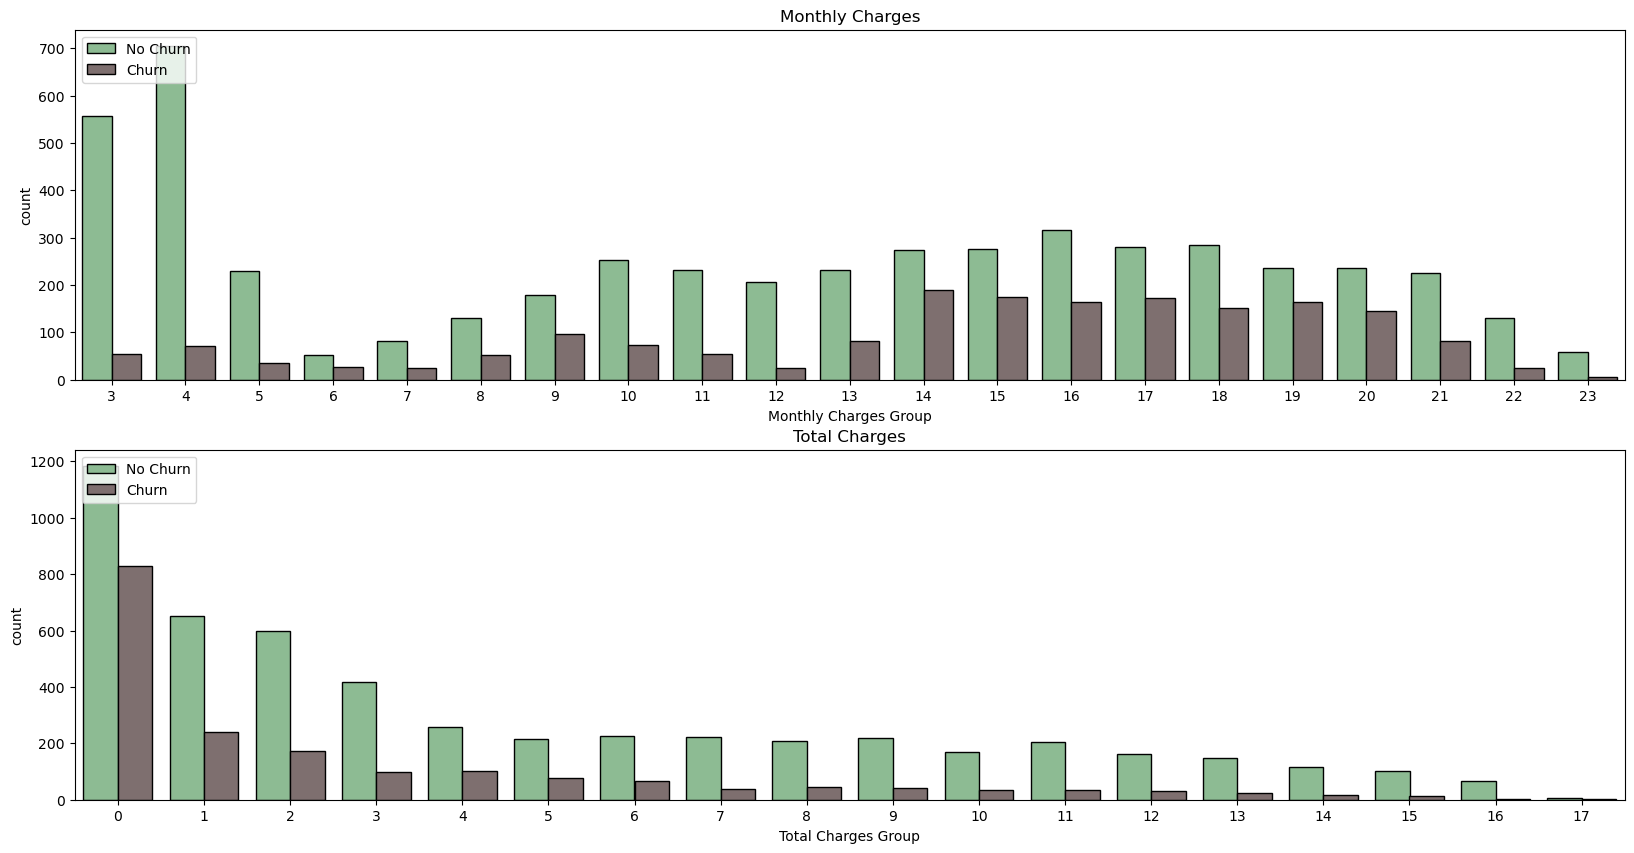

In [31]:
# Para fins de interpretabilidade nos gráficos, pois há muitos valores únicos nessas duas features:
data['Monthly Charges Group'] = [int(i / 5) for i in data['Monthly Charges']]
data['Total Charges Group'] = [int(i / 500) for i in data['Total Charges']]

fig, ax = plt.subplots(nrows = 2,ncols = 1,figsize = (20,10))

for i in range(len(numerical_features_temp[1:3])):
    plt.subplot(2,1,i+1)
    sns.countplot(x=numerical_features_temp[1 + i]+' Group',data = data,hue = "Churn Value",palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = numerical_features_temp[1 + i]
    plt.title(title);

In [32]:
data.drop(['Monthly Charges Group', 'Total Charges Group'], axis=1, inplace=True)

- Monthly Charges: A taxa de cancelamento é alta para valores entre 65 (13 x 5) e 105 (21 x 5).
- Total Charges: A taxa de cancelamento é alta para valores entre 0 (0 x 500) e 1000 (2 x 500).

# Análise boxplot dos dados categóricos com os dados numéricos. 

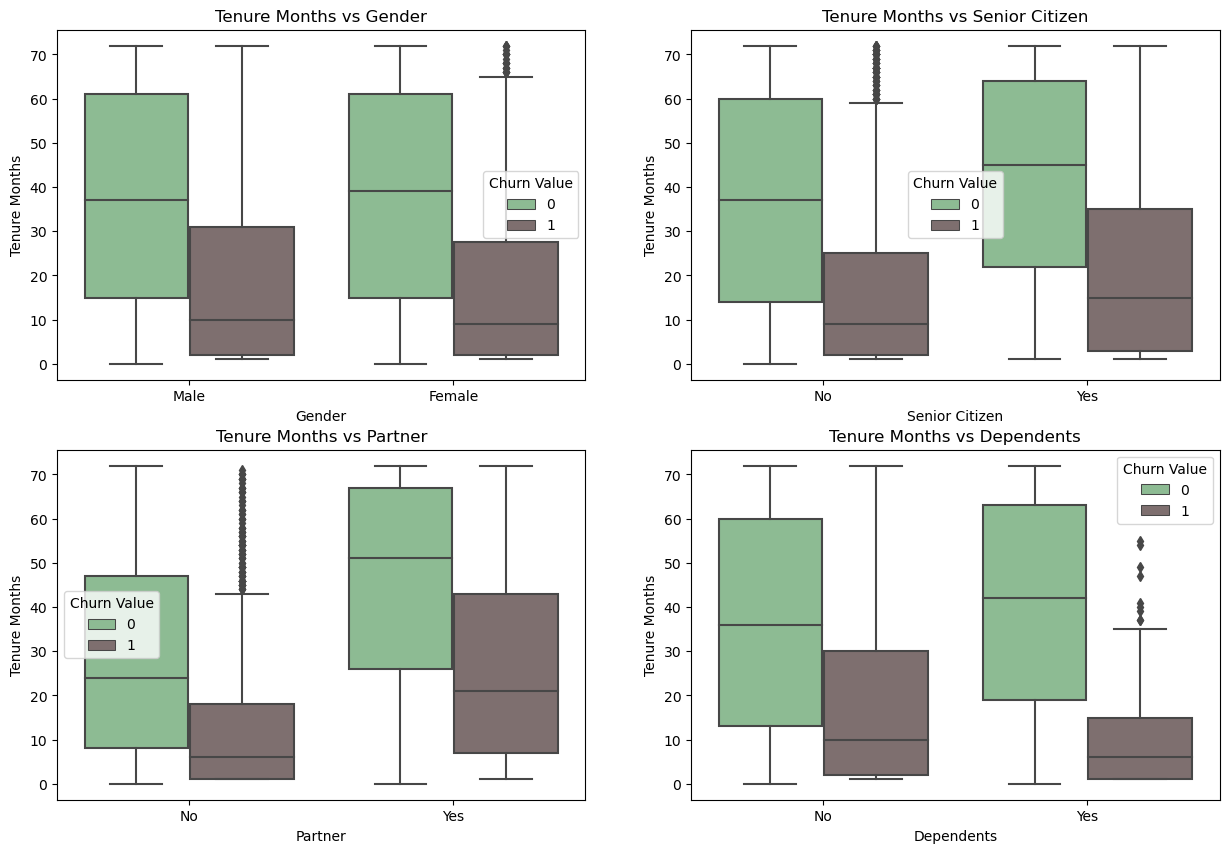

In [33]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = c1[i],y = 'Tenure Months',data = data,hue = 'Churn Value',palette = colors);
    plt.title('Tenure Months vs ' + c1[i]);

- 20-35 meses é um período muito importante de decisão se clientes +65 vão continuar ou não com os serviços da empresa. Para os clientes mais novos que 65 anos, 15-25 meses também é um período muito importante de decisão se vão continuar ou não.
- Clientes com parceiros tendem a ter um período de permanência mais longo e há menos variação nos meses de permanência dos clientes sem parceiros que cancelaram o serviço.
- Clientes com dependentes também tendem a permanecer mais tempo com o serviço. A variação nos meses de permanência entre os clientes com dependentes que cancelaram o serviço é menor do que a variação entre aqueles sem dependentes.
- Em ambos os grupos (com ou sem parceiros e dependentes), os clientes que não cancelaram o serviço mostram uma maior mediana e maior variação nos meses de permanência em comparação com os clientes que cancelaram. Isso sugere que, quanto mais tempo os clientes estão com o serviço, menos prováveis são de cancelar.

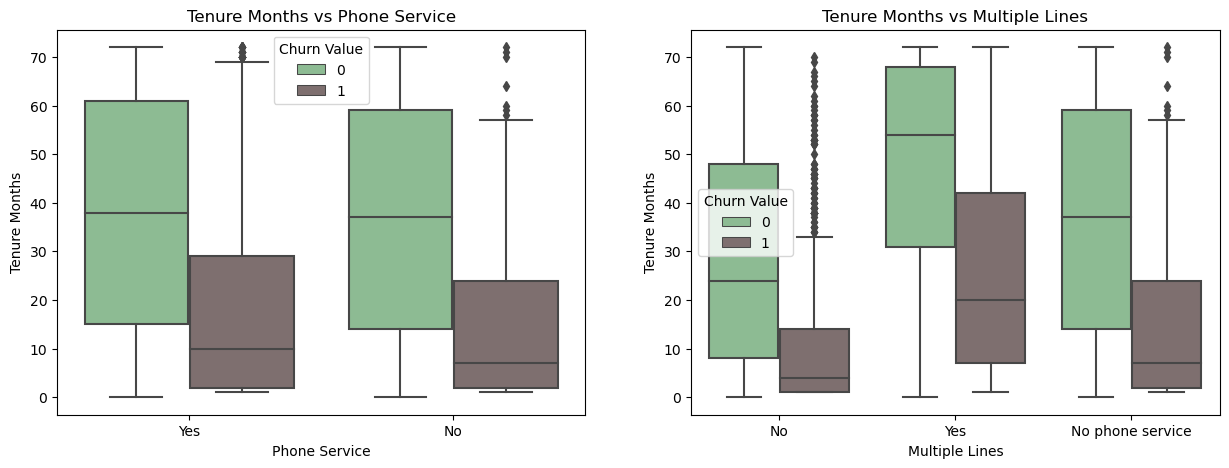

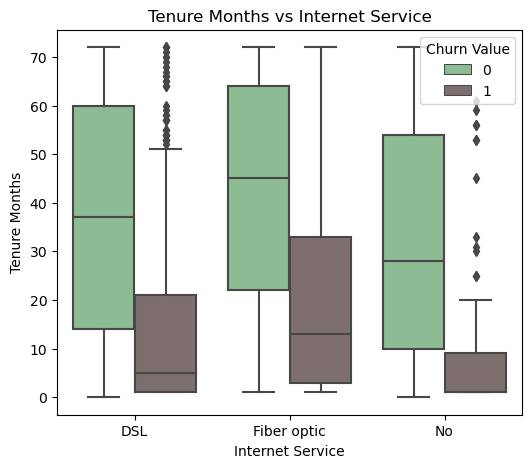

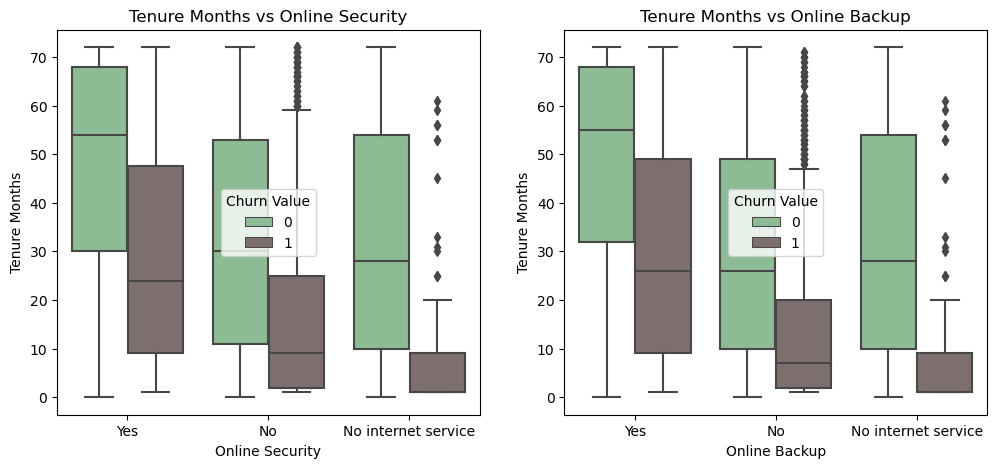

In [34]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(c2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = c2[i],y = 'Tenure Months',data = data,hue = 'Churn Value',palette = colors);
    plt.title('Tenure Months vs ' + c2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = c2[2],y = 'Tenure Months',data = data,hue = 'Churn Value',palette = colors);
plt.title('Tenure Months vs ' + c2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(c2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = c2[i + 3],y = 'Tenure Months',data = data,hue = 'Churn Value',palette = colors);
    plt.title('Tenure Months vs ' + c2[i + 3]);

- Clientes que tem ou não serviço telefônico tendem a permanecer com a empresa por mais tempo, e clientes sem serviço telefônico que cancelaram o serviço tem um período de permanência um pouco mais baixo do que os que obtiveram o serviço.
- Clientes com múltiplas linhas telefônicas e que não cancelaram mostram maior fidelidade, com uma mediana de meses de permanência superior em comparação com clientes sem múltiplas linhas. 
- Clientes sem serviço de internet representam os menores períodos de permanência entre os que cancelaram. Os que obtiveram DSL como serviço de internet, tem uma grande permanência, e clientes que não gostaram do serviço saem por volta dos 5-20 meses. Já para fibra óptica, há uma recorrência alta de cancelamento logo nos primeiros meses se estendendo até 30 meses, um período importante aos usuários de fibra óptica: entre 25-30 meses de uso, é onde ocorrem maiores decisões se vão ou não continuar com o serviço.
- Os serviços adicionais de segurança online e backup online parecem ter um impacto positivo na permanência dos clientes. Aqueles que não tem esses serviços e cancelaram mostram períodos de permanência menores. Entre o período de 30-50 meses, os clientes decidem se vão permanecer ou não.

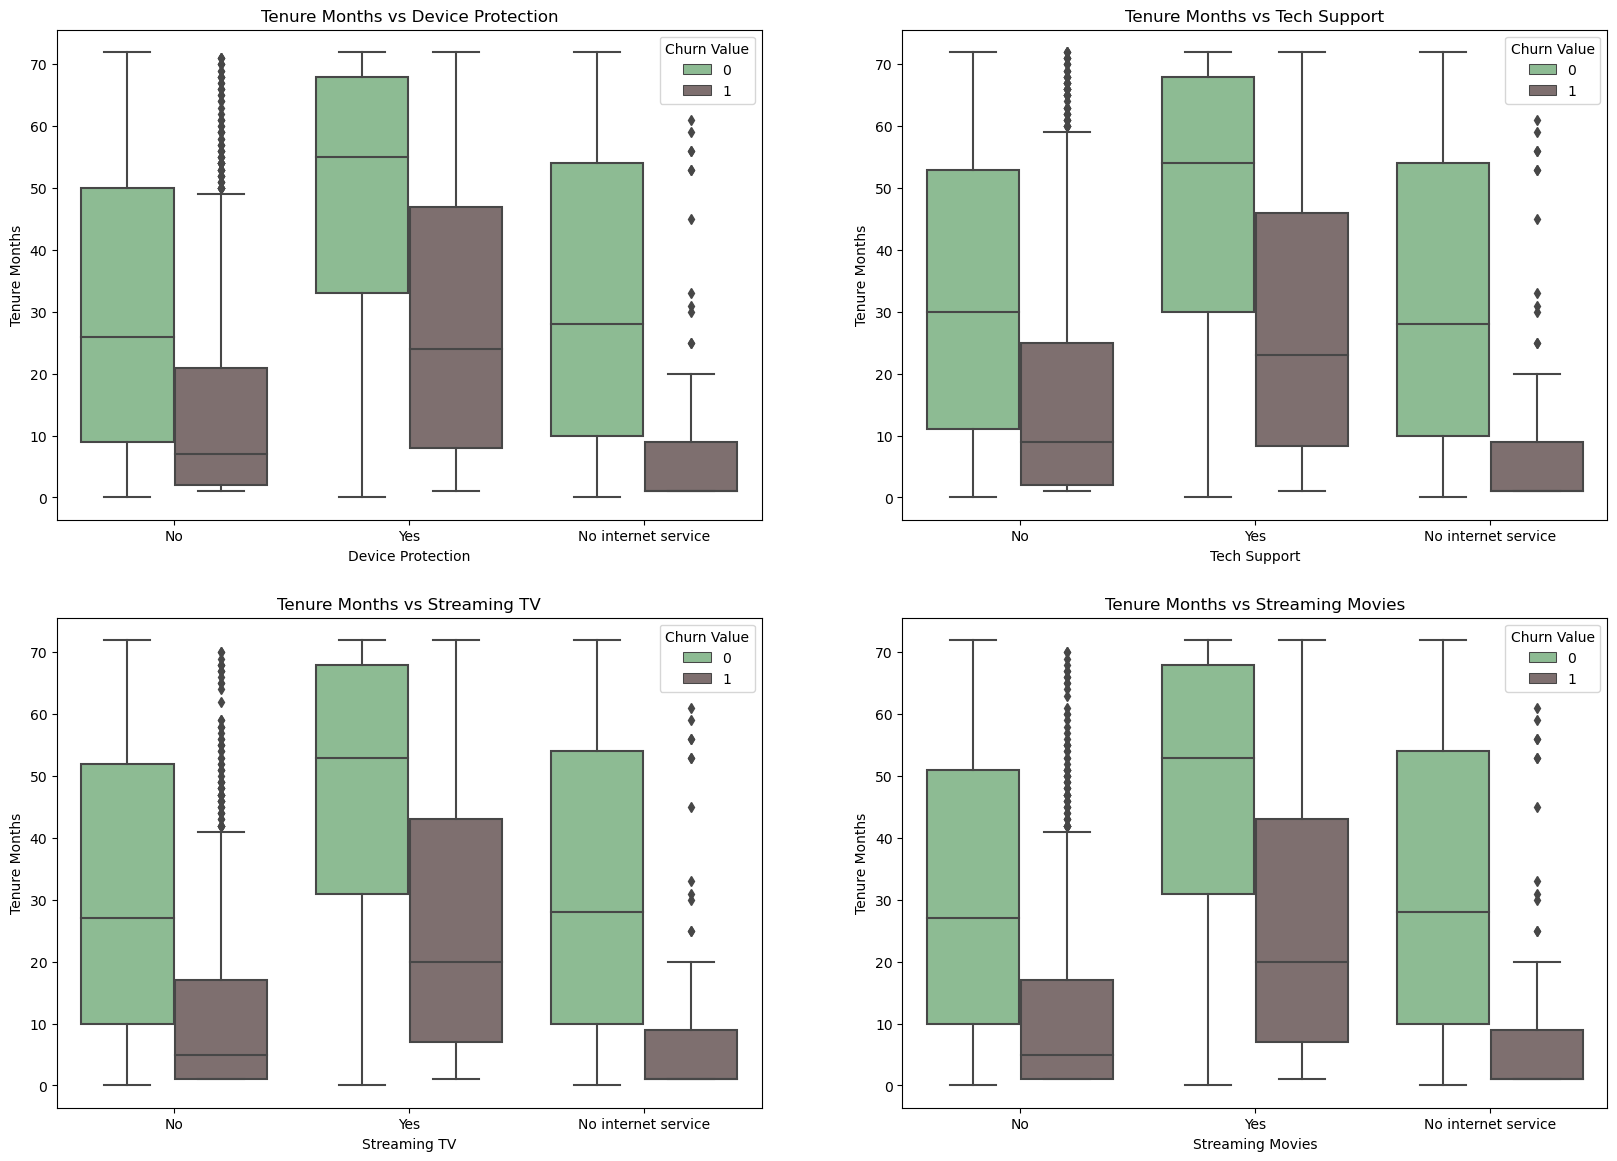

In [35]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(c2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = c2[i - 4],y = 'Tenure Months',data = data,hue = 'Churn Value',palette = colors);
    plt.title('Tenure Months vs ' + c2[i-4]);

- Device Protection e Tech Support também parecem ter um impacto positivo na permanência dos clientes. Porém, entre o período de 25-45 meses é onde os clientes mais decidem se irão ou não permanecer.
- Para os serviços de streaming, os clientes permanecem por bastante tempo com a empresa, e um período de decisão da permanência fica entre mais ou menos entre 30-45 meses, mas deve-se observar o porquê a partir do 20º mês, mais ou menos, a taxa de cancelamento aumenta.

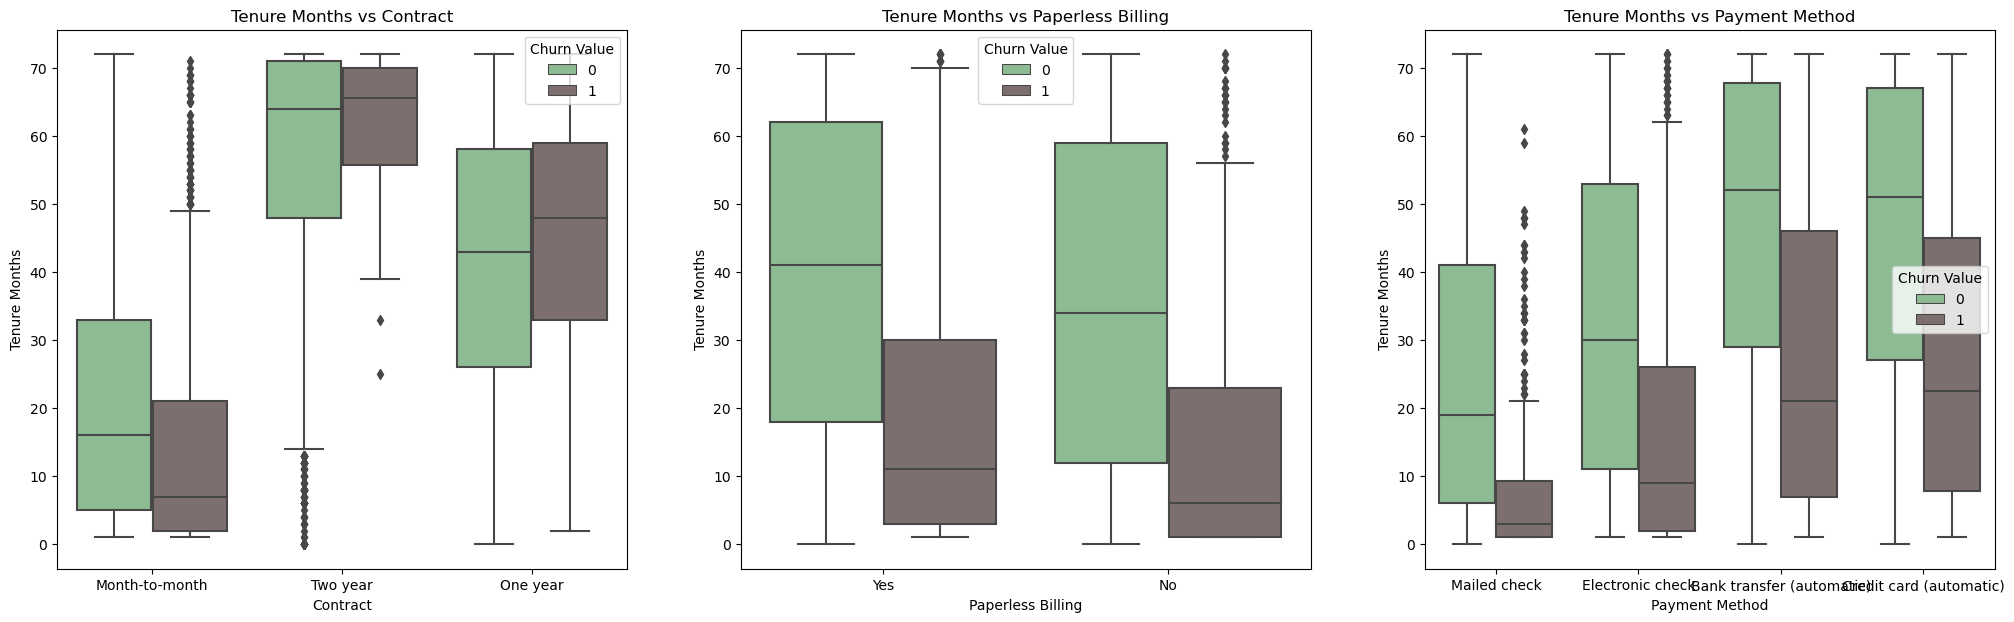

In [36]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
for i in range(len(c3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = c3[i],y = 'Tenure Months',data = data,hue = 'Churn Value',palette = colors);
    plt.title('Tenure Months vs ' + c3[i]);

- Clientes que tem contrato mensal tem uma permanência bem baixa e um índice de cancelamento alto. Contratos de dois anos, a taxa de cancelamento se inicia depois da terceira renovação mais ou menos. Para os contratos de um ano, também depois da terceira renovação. 
- Para pagamentos eletrônicos, os que adquirem, cancelam logo nos primeiros meses e a partir do 10º mês, a frequência de casos de cancelamento aumenta muito. A permanência dos que adquirem e não, é bem parecida.
- Agora sobre os métodos de pagamento, mailed check é o que o cancelamento ocorre mais rápido. Para pagamentos automáticos, a permanência é mais alta.

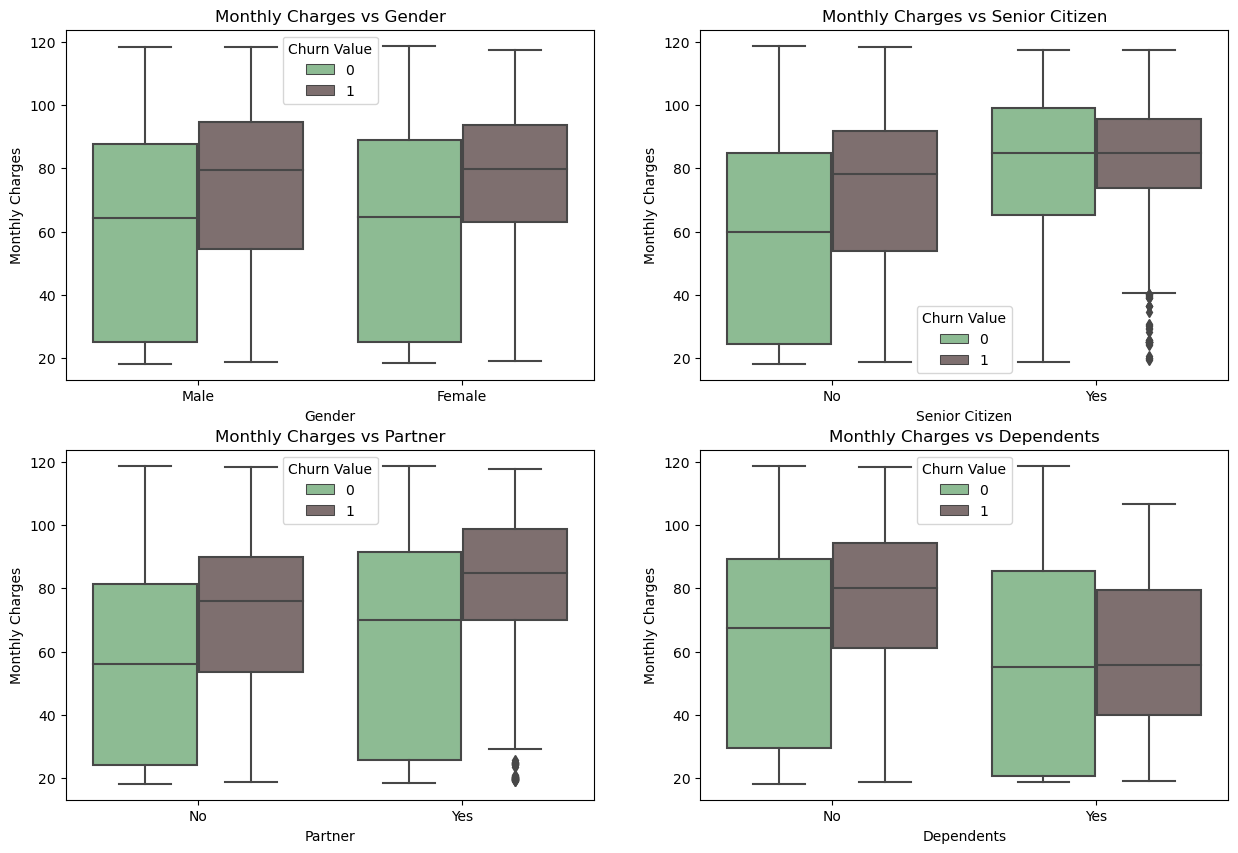

In [37]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = c1[i],y = 'Monthly Charges',data = data,hue = 'Churn Value',palette = colors); 
    plt.title('Monthly Charges vs ' + c1[i]);

- Clientes +65 que cancelaram parecem pagar mensalidades mais altas em comparação aos mais novos.
- Clientes com parceiros tendem a ter cobranças mensais mais altas, mas isso é verdade para ambos, clientes que permanecem e os que cancelaram. Talvez por ser que casais tendem a contratar mais serviços ou pacotes mais caros.
- Clientes sem dependentes que cancelaram pagavam mensalidades mais altas do que os que tem dependentes.
- O ponto mais importante a ser destacado é que o cancelamento ocorre para valores mais altos de mensalidade, perceptivamente.

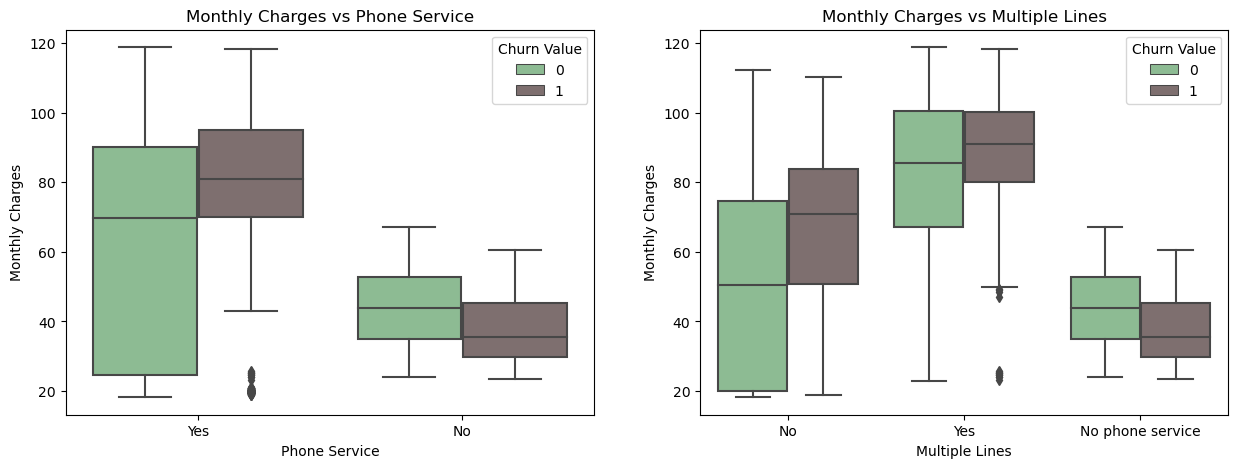

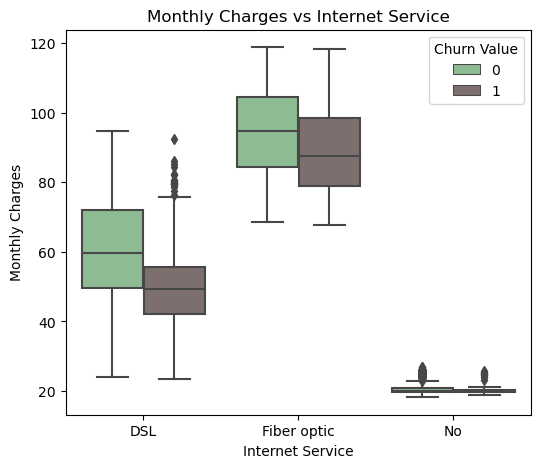

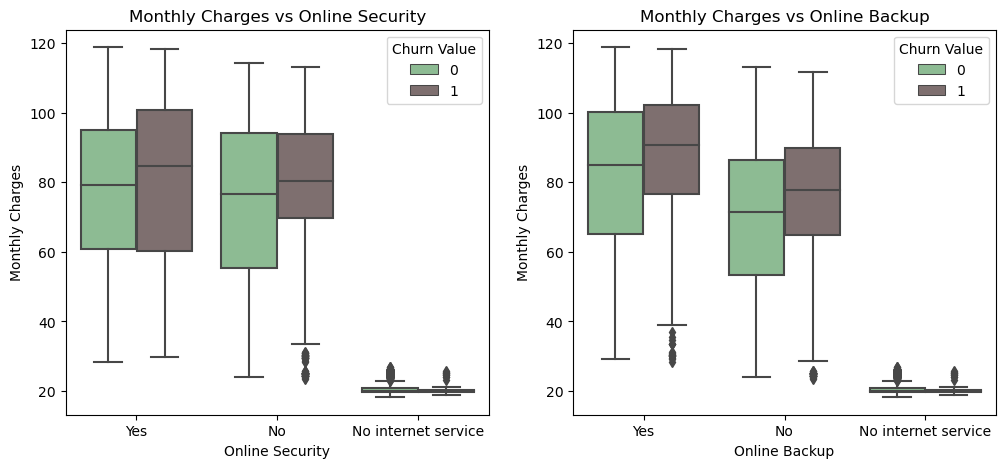

In [38]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(c2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = c2[i],y = 'Monthly Charges',data = data,hue = 'Churn Value',palette = colors);
    plt.title('Monthly Charges vs ' + c2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = c2[2],y = 'Monthly Charges',data = data,hue = 'Churn Value',palette = colors);
plt.title('Monthly Charges vs ' + c2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(c2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = c2[i + 3],y = 'Monthly Charges',data = data,hue = 'Churn Value',palette = colors);
    plt.title('Monthly Charges vs ' + c2[i + 3]);

- Cancelamentos para serviço telefônico foram para valores muito altos de cobrança. O mesmo ocorre para múltiplas linhas.
- Cobranças mensais para internet de fibra óptica são muito altas. Essa pode ser a maior razão para tantos cancelamentos para esse serviço.
- Para os serviços de online security e online backup, os clientes não parecem pensar em cancelar se for analisar que para os que cancelaram e os que não cancelaram a faixa de valores é bem parecida.

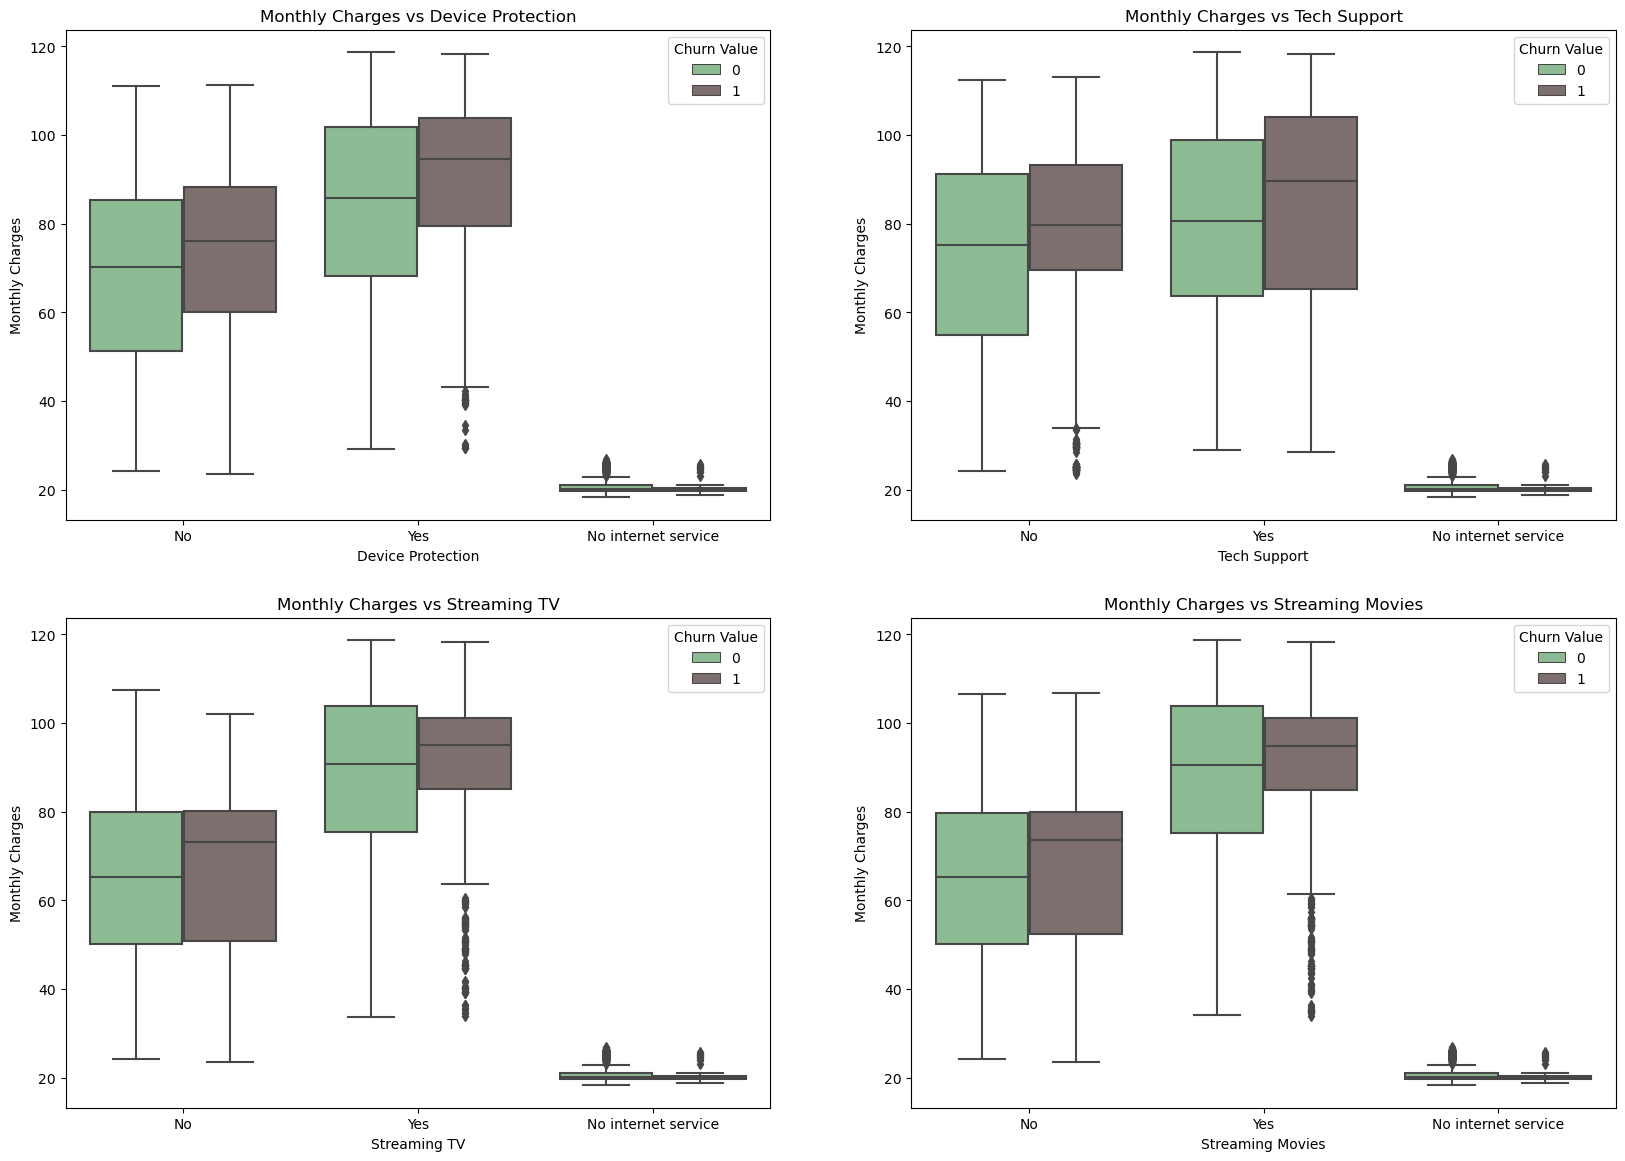

In [39]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(c2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = c2[i - 4],y = 'Monthly Charges',data = data,hue = 'Churn Value',palette = colors);
    plt.title('Monthly Charges vs ' + c2[i-4]);

- Para Device Protection, Tech Support e serviços de streaming, o mesmo se aplica, os clientes não parecem pensar em cancelar se for analisar que para os que cancelaram e os que não cancelaram a faixa de valores é bem parecida.
- Para os serviços de streaming, acrescento que os clientes parecem se disponibilizar em pagar um pouco mais caro, e sem muitos riscos.

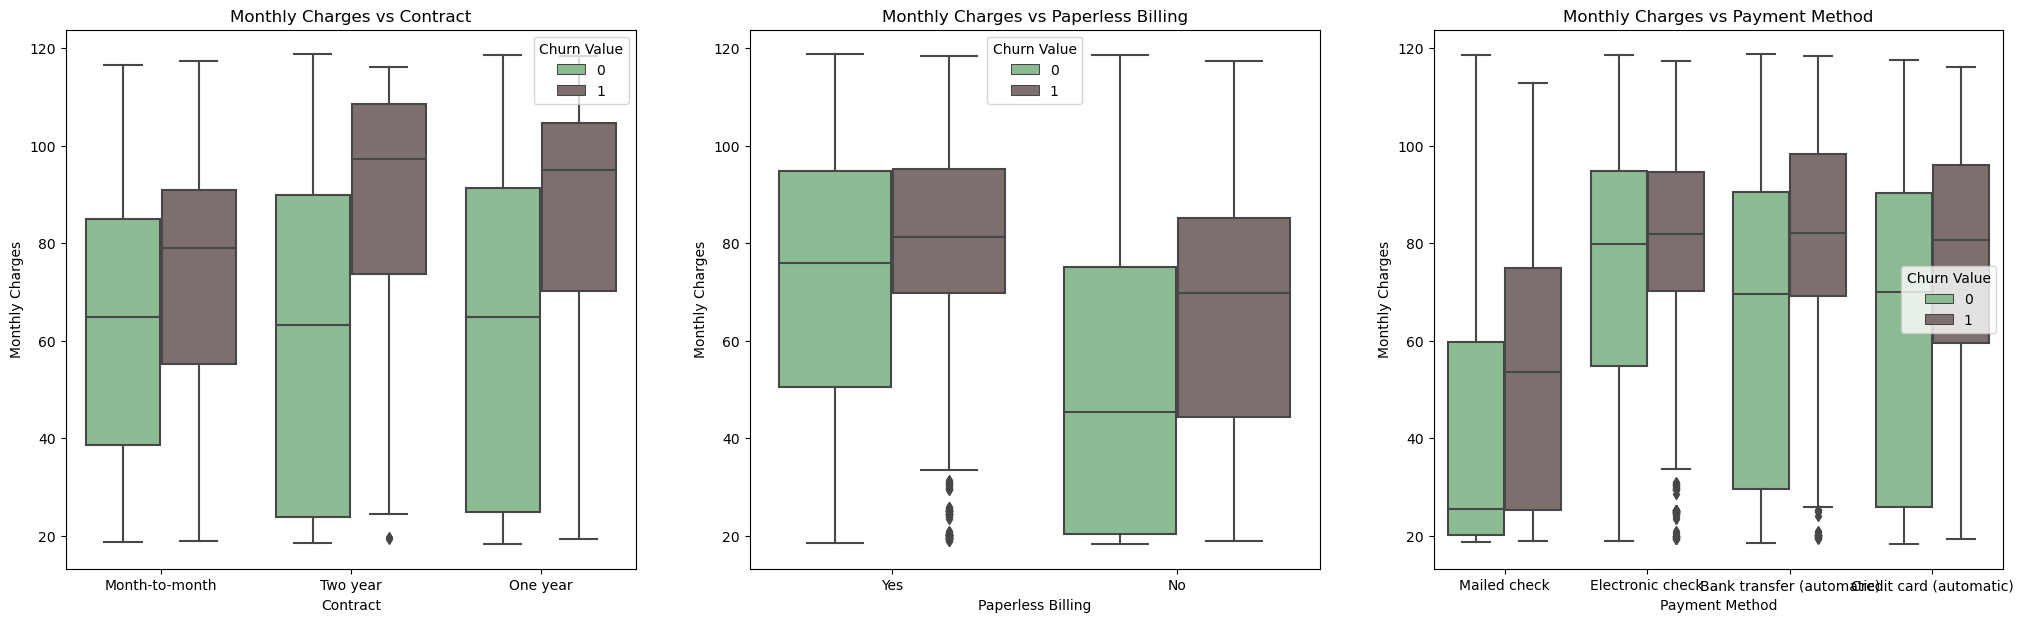

In [40]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
for i in range(len(c3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = c3[i],y = 'Monthly Charges',data = data,hue = 'Churn Value',palette = colors);
    title = 'Monthly Charges vs ' + c3[i]
    plt.title(title);

- Contratos de um/dois anos tem muitos cancelamentos para valores altos.
- Pagamentos automáticos tem um tempo de permanência maior dos clientes com a empresa.

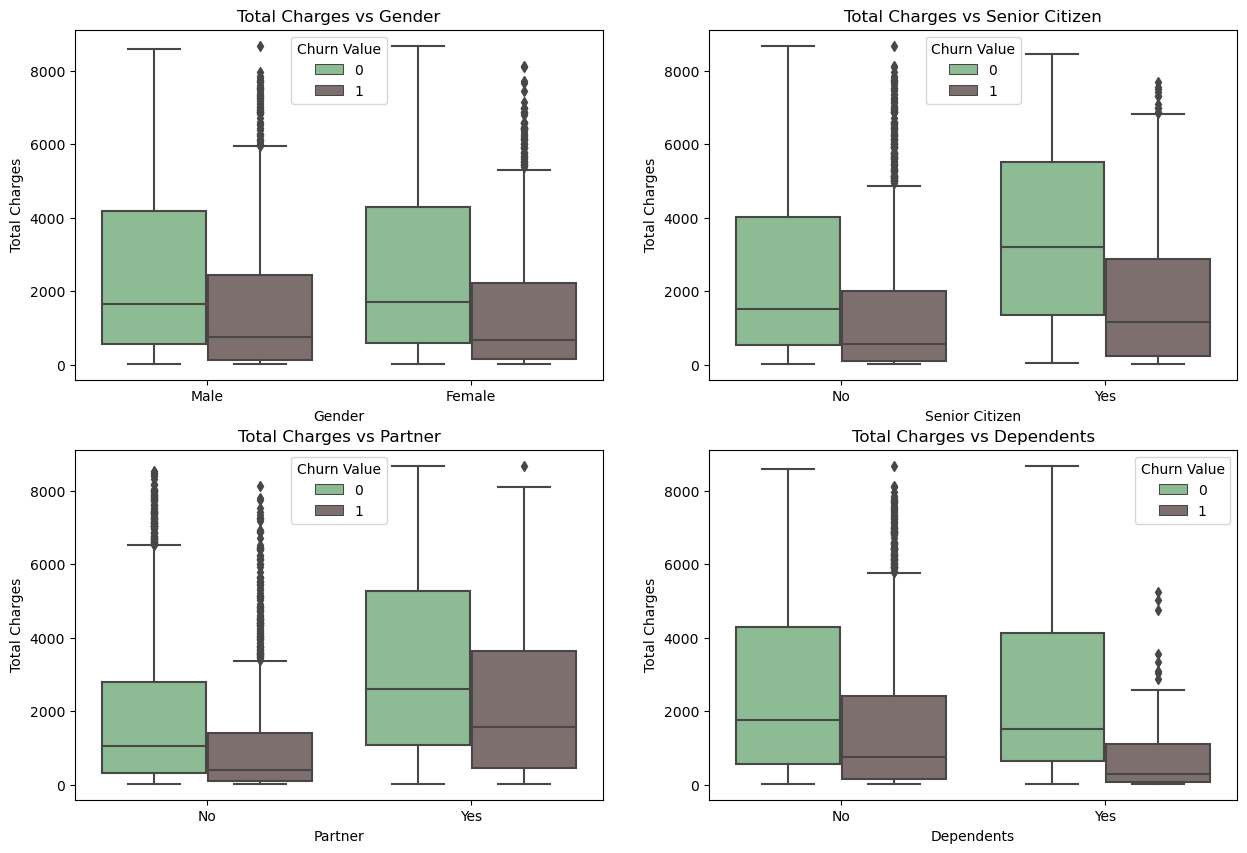

In [41]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = c1[i],y = 'Total Charges',data = data,hue = 'Churn Value',palette = colors);
    plt.title('Total Charges vs ' + c1[i]);

- Clientes +65 que continuaram com os serviços, pagam mais do que clientes mais novos.
- Clientes com parceiro(a) também pagam mais do que os que não tem.

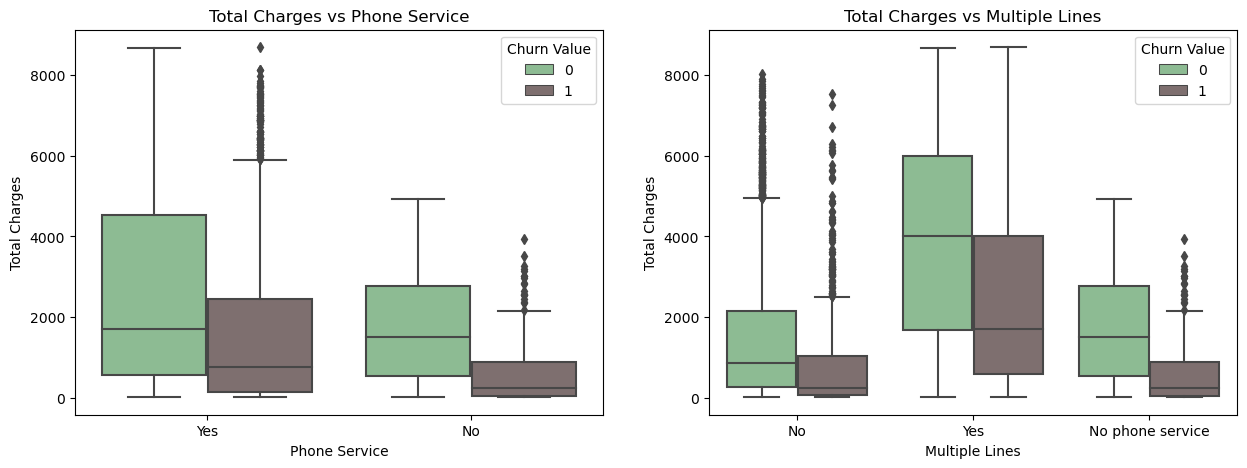

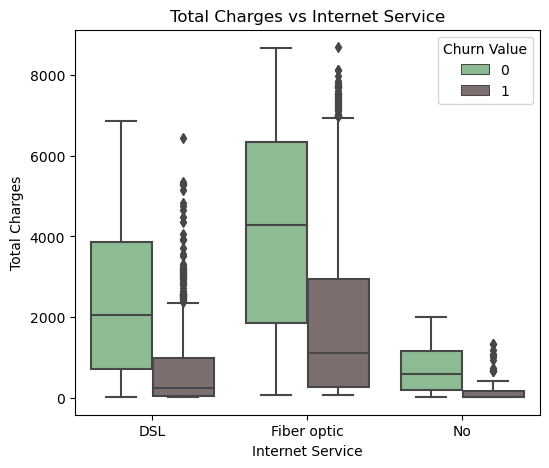

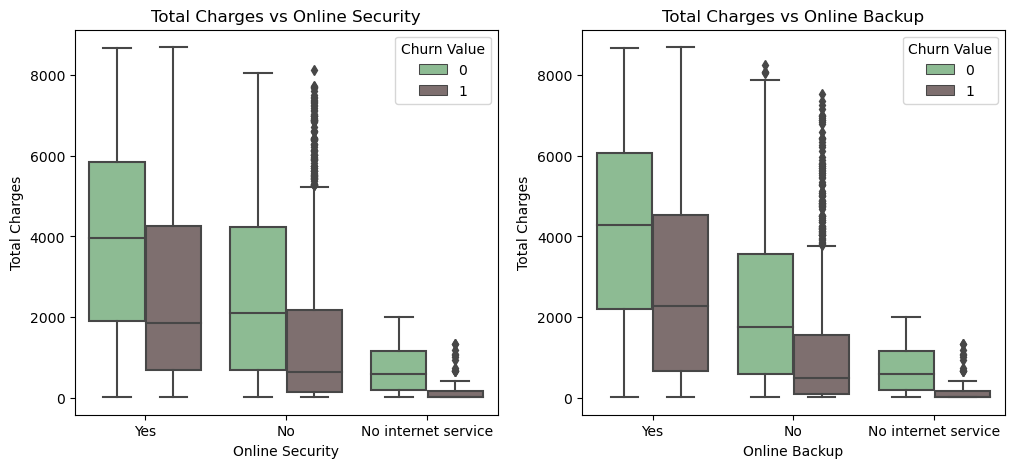

In [42]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(c2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = c2[i],y = 'Total Charges',data = data,hue = 'Churn Value',palette = colors);
    plt.title('Total Charges vs ' + c2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = c2[2],y = 'Total Charges',data = data,hue = 'Churn Value',palette = colors);
plt.title('Total Charges vs ' + c2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(c2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = c2[i + 3],y = 'Total Charges',data = data,hue = 'Churn Value',palette = colors);
    plt.title('Total Charges vs ' + c2[i + 3]);

- Para serviços de telefone, por volta de 1000 os clientes começam a pensar se continuarão ou não.
- Para múltiplas linhas, é a partir de 2000 que os clientes começam a pensar se vão continuar. Mas, muitos ultrapassam os gastos de 4000 indo até 6000 para uso de múltiplas linhas.
- Para serviços de internet, fibra óptica é onde os clientes mais pagam caro, mas deixam o serviço geralmente por volta de 1500-2000.
- Online Security e Online Backup, por volta de 2000 os clientes tendem a cancelar. 

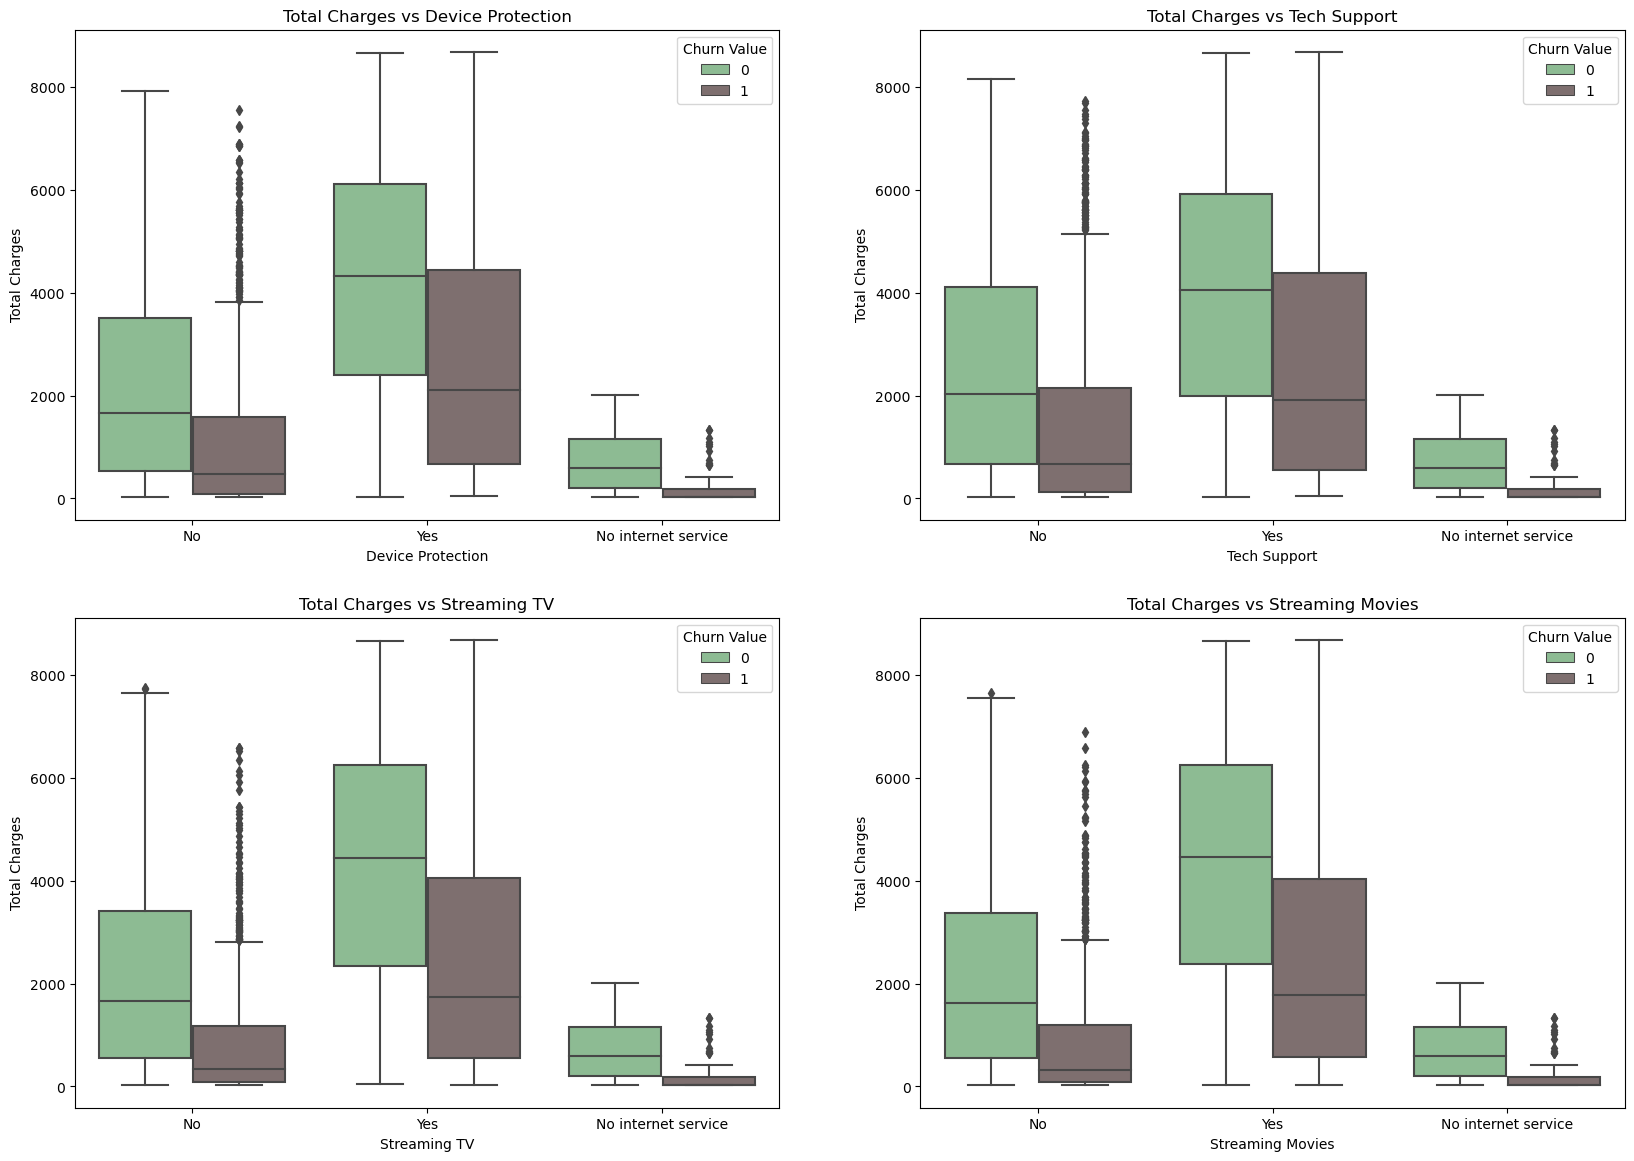

In [43]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(c2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = c2[i - 4],y = 'Total Charges',data = data,hue = 'Churn Value',palette = colors);
    plt.title('Total Charges vs ' + c2[i-4]);

- Todas as observações acima, por volta do valor de 2000, a decisão de cancelar ou não surge com mais frequência.

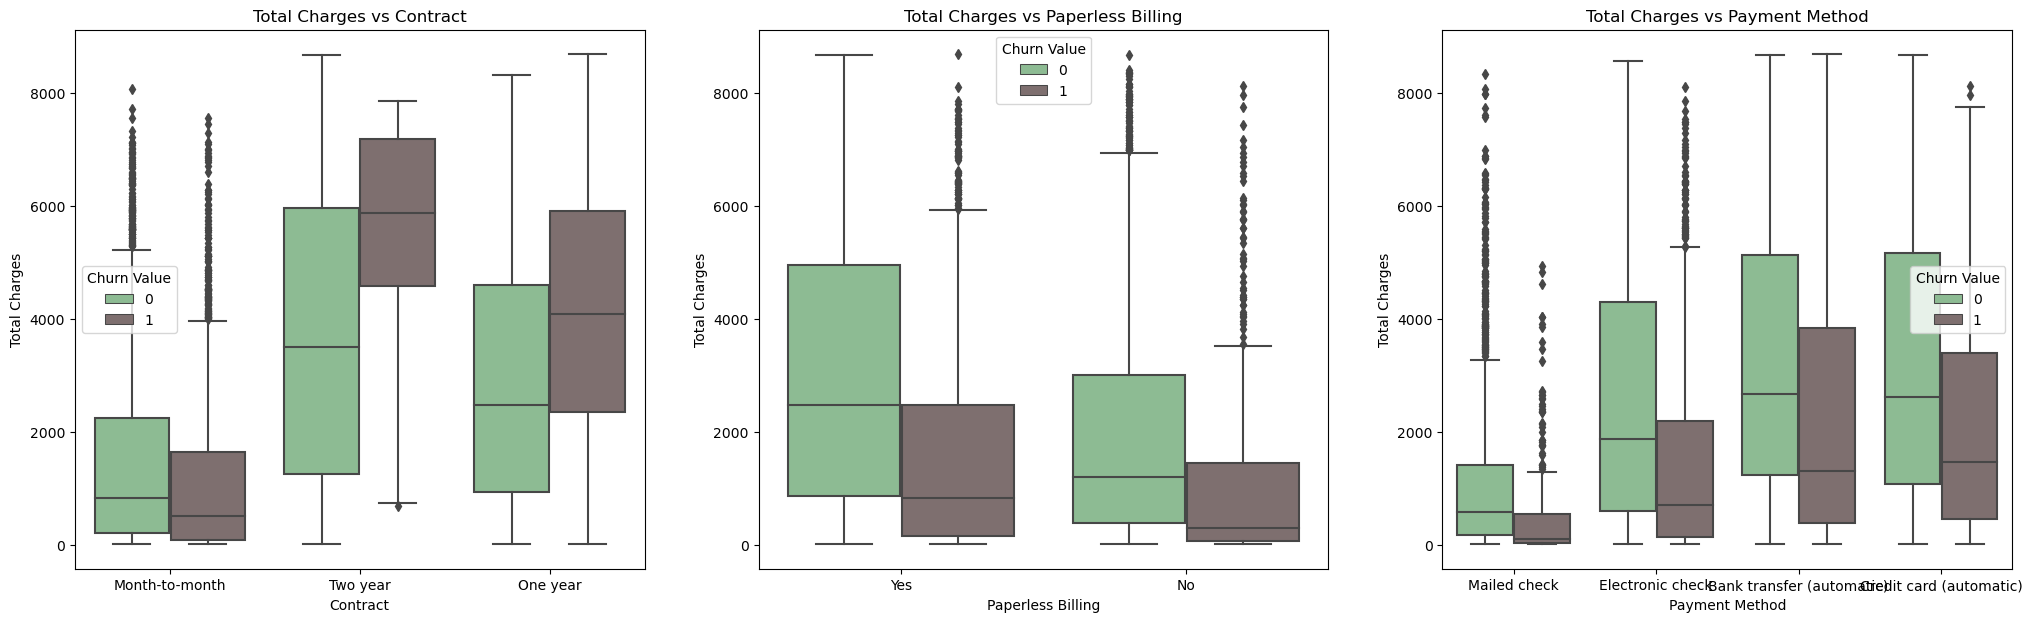

In [44]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
for i in range(len(c3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = c3[i],y = 'Total Charges',data = data,hue = 'Churn Value',palette = colors);
    plt.title('Total Charges vs ' + c3[i]);

- Os valores médios dos clientes que decidem cancelar os serviços com contratos de um e dois anos são elevados, em torno de 4000-6000. Alguns dos clientes com dois anos de contrato chegaram a pagar cerca de 7.000.
- Para os métodos de pagamento, clientes que usam electronic check cancelam em valores de 0-2000. Para os métodos automáticos, esse valor vai para até 4000.

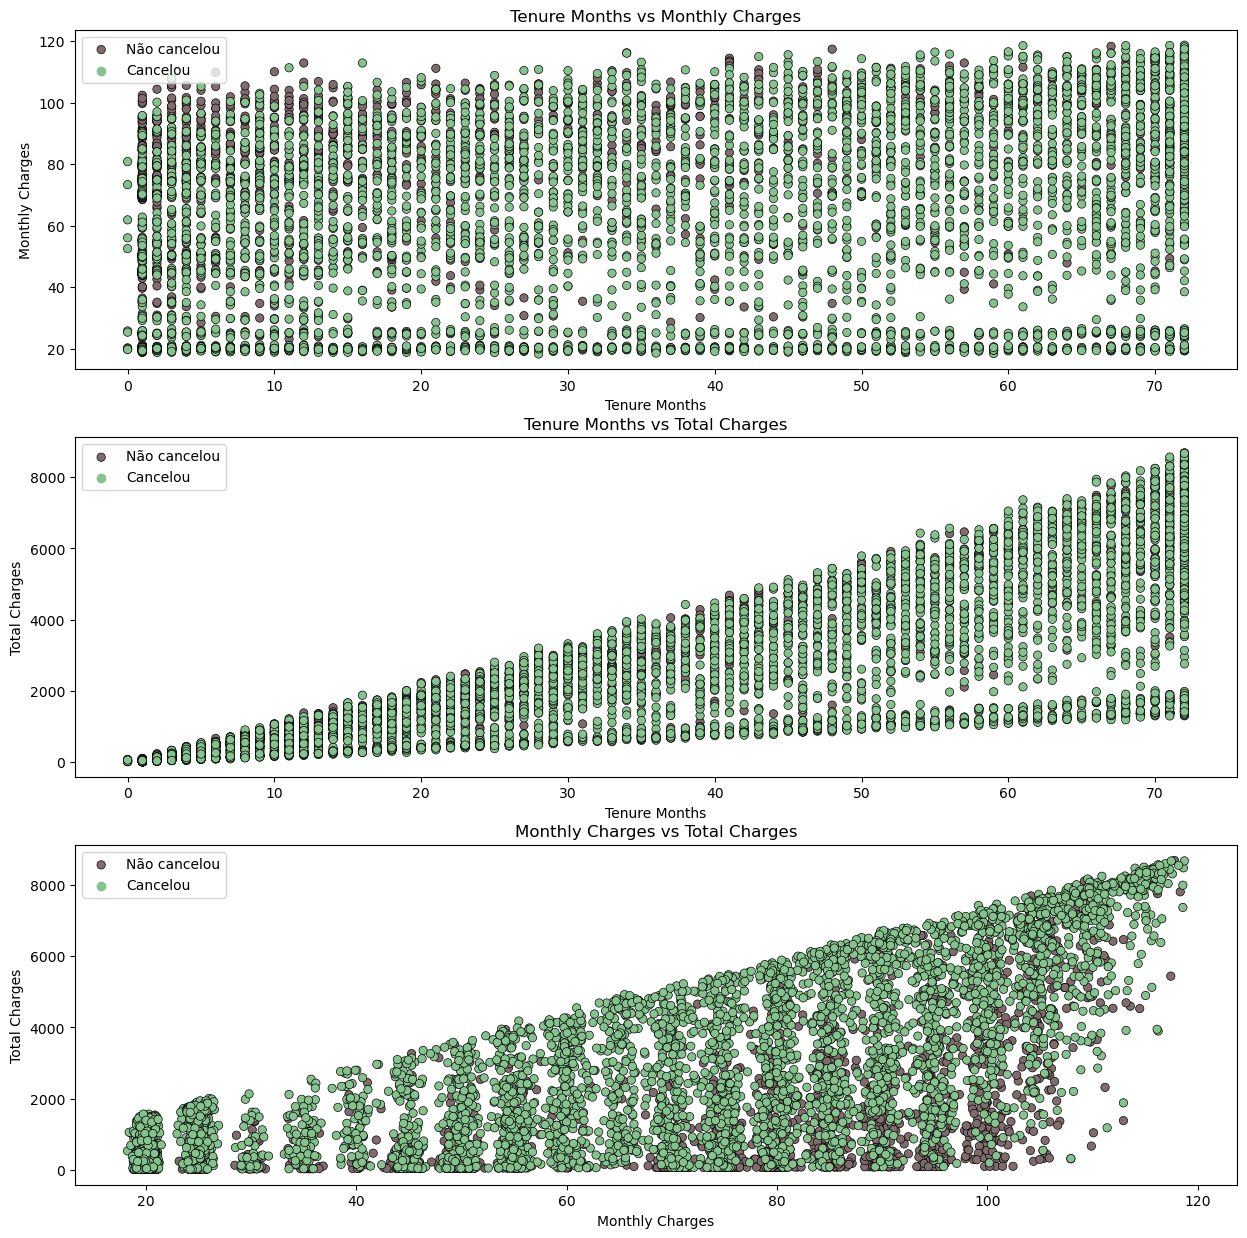

In [45]:
a = 0
x = numerical_features[2:5]
fig, ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(x)):
    for j in range(len(x)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x=x[i], y=x[j], data=df, hue='Churn Value', palette=colors, edgecolor='black');
            plt.legend(['Não cancelou','Cancelou'], loc='upper left')
            title = x[i] + ' vs ' + x[j]
            plt.title(title)

In [46]:
numerical_features

['Latitude',
 'Longitude',
 'Tenure Months',
 'Monthly Charges',
 'Total Charges',
 'Churn Value']

In [47]:
categorical_features

['City',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Churn Reason']

In [48]:
grouped = data.groupby(['Latitude', 'Longitude', 'Churn Value']).size().reset_index(name='Churn Count')
total_counts = data.groupby(['Latitude', 'Longitude']).size().reset_index(name='Total Count')

In [49]:
merged_data = pd.merge(grouped, total_counts, on=['Latitude', 'Longitude'])
merged_data['Churn Rate'] = round(merged_data['Churn Count'] / merged_data['Total Count'], 2)
merged_data = merged_data[merged_data['Churn Value'] == 1].sort_values(by='Churn Rate', ascending=False)
loc_ChurnLabel = merged_data[['Latitude', 'Longitude', 'Churn Rate', 'Total Count']]

In [50]:
loc_ChurnLabel

Latitude   Longitude  Churn Rate  Total Count
2129  38.348884 -122.516990         1.0            4
1522  37.171727 -122.142961         1.0            4
2597  40.022184 -121.062384         1.0            4
1207  35.363339 -117.637641         1.0            4
1127  34.737031 -119.460557         1.0            4
...         ...         ...         ...          ...
665   34.035849 -118.503508         0.2            5
663   34.035602 -117.591528         0.2            5
646   34.024405 -117.898722         0.2            5
644   34.023810 -118.156582         0.2            5
1     32.555828 -117.040073         0.2            5

[1190 rows x 4 columns]

Proporção calculada de clientes que cancelaram o serviço em relação ao número total de clientes em cada localização geográfica.

Total Count = Número total de clientes para cada localização

In [51]:
loc_ChurnLabel['Churn Rate'].value_counts()

0.25    499
0.50    278
0.20    165
0.40    124
0.75     56
0.60     40
1.00     16
0.80     12
Name: Churn Rate, dtype: int64

## Distribuição geográfica do número total de clientes.

In [52]:
fig = px.scatter_mapbox(loc_ChurnLabel,
                        lat="Latitude", lon='Longitude',
                        hover_data=['Total Count'], mapbox_style='open-street-map',
                        color="Total Count")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Taxa de cancelamento por localização geográfica.

In [53]:
fig = px.scatter_mapbox(loc_ChurnLabel,
                        lat="Latitude", lon='Longitude',
                        hover_data=['Churn Rate'], mapbox_style='open-street-map',
                        color="Churn Rate")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [54]:
data['City'].nunique()

1129

In [55]:
grouped = data.groupby(['City', 'Churn Value']).size().reset_index(name='Churn Count')
total_counts = data.groupby(['City']).size().reset_index(name='Total Count')

In [56]:
merged_data = pd.merge(grouped, total_counts, on=['City'])
merged_data['Churn Rate'] = round(merged_data['Churn Count'] / merged_data['Total Count'], 2)
merged_data = merged_data[merged_data['Churn Value'] == 1]

In [57]:
City_ChurnLabel = merged_data[['City', 'Churn Rate', 'Total Count']]

In [58]:
City_ChurnLabel

City  Churn Rate  Total Count
1                     Acampo        0.75            4
4                   Adelanto        0.20            5
6                       Adin        0.50            4
8               Agoura Hills        0.40            5
10                   Aguanga        0.25            4
...                      ...         ...          ...
1938               Yorkville        0.25            4
1940  Yosemite National Park        0.50            4
1944               Yuba City        0.25            8
1946                 Yucaipa        0.25            4
1949                   Zenia        0.25            4

[833 rows x 3 columns]

In [59]:
fig1 = px.bar(City_ChurnLabel.sort_values(by='Total Count', ascending=False).head(20), 
              x='City', 
              y='Total Count', 
              title='Quantidade de clientes por cidade', 
              text='Total Count')

fig1.update_layout(
    xaxis_title="Cidades",
    yaxis_title="Quantidade de Clientes"
)

fig1.show()

In [60]:
fig2 = px.bar(City_ChurnLabel.sort_values(by='Total Count', ascending=False).head(20), 
              x='City', 
              y='Churn Rate', 
              title='Taxa de churn das cidades com mais clientes', 
              text='Churn Rate')

fig2.update_layout(
    xaxis_title="Cidades",
    yaxis_title="Taxa de Churn"
)

fig2.show()

In [61]:
fig = px.bar(City_ChurnLabel.sort_values(by='Churn Rate', ascending=False).head(40),
             x='City', y= 'Churn Rate', title='Taxa de cancelamento por cidade')
fig.update_layout(
    xaxis_title="Cidade",
    yaxis_title="Proporção"
)
fig.show()

In [62]:
City_ChurnLabel[['City', 'Churn Rate', 'Total Count']].sort_values(by='Churn Rate', ascending=False).head(40)

City  Churn Rate  Total Count
1778           Truckee        1.00            4
814       Johannesburg        1.00            4
1629       Smith River        1.00            4
521           Eldridge        1.00            4
183      Boulder Creek        1.00            4
1752            Tipton        1.00            4
1932        Wrightwood        1.00            4
1018          Maricopa        1.00            4
1655  South Lake Tahoe        1.00            4
1454         Riverbank        1.00            4
601         Fort Jones        1.00            4
1791             Twain        1.00            4
1589            Seeley        0.80            5
787       Indian Wells        0.80            5
1504         San Dimas        0.80            5
1279     Panorama City        0.80            5
154              Biola        0.75            4
1367       Pope Valley        0.75            4
1               Acampo        0.75            4
1299       Pearblossom        0.75            4
884          Lake City        0.75            4
927           Lewiston        0.75            4
1579         Sausalito        0.75            4
1692        Summerland        0.75            4
1290          Paskenta        0.75            4
171            Bodfish        0.75            4
804            Jackson        0.75            4
825              Keene        0.75            4
550             Exeter        0.75            4
1391            Quincy        0.75            4
1886         Wheatland        0.75            4
197        Bridgeville        0.75            4
566            Fellows        0.75            4
1736         Templeton        0.75            4
225              Byron        0.75            4
1443          Rio Dell        0.75            4
718            Hayfork        0.75            4
1477   Running Springs        0.75            4
682      Grizzly Flats        0.75            4
680             Grimes        0.75            4

In [63]:
fig = px.bar(City_ChurnLabel.sort_values(by='Churn Rate', ascending=True).head(40),
             x='City', y= 'Churn Rate', title='Taxa de cancelamento por cidade')
fig.update_layout(
    xaxis_title="Cidade",
    yaxis_title="Proporção"
)
fig.show()

In [64]:
City_ChurnLabel[['City', 'Churn Rate', 'Total Count']].sort_values(by='Churn Rate', ascending=True).head(40)

City  Churn Rate  Total Count
632           Gardena        0.07           15
135     Beverly Hills        0.07           15
1523      San Leandro        0.08           12
99        Bakersfield        0.08           40
1421    Redondo Beach        0.10           10
66            Arcadia        0.10           10
1929   Woodland Hills        0.10           10
864           La Mesa        0.10           10
386            Corona        0.10           20
539            Encino        0.10           10
1105    Monterey Park        0.10           10
1405  Rancho Santa Fe        0.10           10
1087    Mission Viejo        0.12            8
974         Los Altos        0.12            8
1790           Tustin        0.12            8
306     Castro Valley        0.12            8
607      Frazier Park        0.12            8
620         Fullerton        0.12           16
1625      Simi Valley        0.12            8
1803        Vacaville        0.12            8
1873  West Sacramento        0.12            8
336    Citrus Heights        0.12            8
431          Danville        0.12            8
375           Compton        0.13           15
1233           Orange        0.15           20
1700        Sunnyvale        0.17           12
1417          Redding        0.17           12
1894         Whittier        0.17           30
729             Hemet        0.17           12
798            Irvine        0.18           28
1809          Vallejo        0.19           16
1425     Redwood City        0.19           16
542         Escondido        0.20           20
1284       Parker Dam        0.20            5
1282        Paramount        0.20            5
1099        Montclair        0.20            5
1181      North Hills        0.20            5
239        Calipatria        0.20            5
1542        San Pedro        0.20           10
1550       San Ysidro        0.20            5

In [65]:
fig = px.scatter(City_ChurnLabel.sort_values(by='Churn Rate', ascending=False).head(20), x='City', y='Churn Rate', size='Total Count', title='Taxa de Churn x Quantidade de Clientes por Cidade')

fig.update_layout(
    xaxis_title="Cidades",
    yaxis_title="Taxa de Churn",
    xaxis={'categoryorder':'total descending'}
)

fig.show()

Realizar:
- Testes estatísticos.